<a href="https://colab.research.google.com/github/Srushtirodge/Capstone_Project_ML-Yes_Bank_Stock_Closing_Price_Prediction-/blob/main/Capstone_Project_ML(Yes_Bank_Stock_Closing_Price_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes_Bank_Stock_Closing_Price_Prediction(Capstone_Project_Supervised_ML_Regression)**

##### **Project Type**    - Regression
##### **Contribution**    - Srushti Rodge

# **`Project Summary -`**


Yes_Bank_Stock_Closing_Price_Prediction(Capstone_Project_Supervised_ML_Regression)
Project Type - Regression
Contribution - Team
Team Member 1 - Vibuti Gupta
Team Member 2 - Rudraashish Sengupta
Project Summary -
Yes_Bank_Logo-01.png

This project aims to address the challenge of predicting the closing price of Yes Bank's stock, which is a crucial task for stakeholders, investors, and market participants. Yes Bank, as a prominent private sector bank in India, has encountered significant hurdles in recent years, including a substantial number of bad loans and involvement in fraud cases. These challenges have led to regulatory intervention by the Reserve Bank of India, making the prediction of Yes Bank's stock prices complex and uncertain.

To tackle this challenge, the project utilizes a comprehensive dataset comprising monthly stock price data since the bank's inception. The dataset includes various important metrics such as the closing, starting, highest, and lowest prices for each month. The objective is to develop predictive models that can effectively capture the intricate dynamics and trends in Yes Bank's stock prices, taking into account the turbulent events and uncertainties associated with the bank's performance.

The project involves applying various modeling techniques, including time series models regression methods. The goal is to evaluate the performance of these models in accurately forecasting the closing price of Yes Bank's stock. Additionally, the models will be assessed on their ability to incorporate the impact of significant events, such as fraud cases involving the bank's founders or regulatory interventions by the Reserve Bank of India.

By successfully predicting the closing price of Yes Bank's stock, this project can provide valuable insights and assist stakeholders in making informed decisions related to their investments in the bank. It aims to navigate the complexities and uncertainties surrounding Yes Bank's stock prices, ultimately contributing to the understanding of its financial performance and aiding in effective decision-making.

# **`GitHub Link -`**

# **`Problem Statement`**

The main objective of this project is to develop a robust and accurate predictive model that can effectively forecast the closing price of Yes Bank's stock. The challenge lies in understanding and capturing the complex dynamics and trends in the stock prices, considering various factors such as the historical trend of an increasing price followed by a sudden decline after 2018.

One of the key challenges in developing the predictive model is addressing the issue of multicollinearity present in the dataset. Multicollinearity occurs when there is a high correlation between independent variables, which can lead to difficulties in interpreting the model and can affect the accuracy of the predictions. Therefore, the model should incorporate techniques to handle multicollinearity and ensure that the independent variables are appropriately considered in the prediction process.

Furthermore, the model should account for significant events that have had an impact on Yes Bank's stock performance. This includes events such as fraud cases involving the bank's founders and regulatory interventions by the Reserve Bank of India. These events can significantly influence the stock prices, and it is crucial for the predictive model to capture and reflect their effects accurately.

In terms of performance, the model should aim for a high level of accuracy in forecasting the closing price of Yes Bank's stock. The 99% accuracy achieved by the K-Nearest Neighbors (KNN) Regression model serves as a benchmark, indicating the target accuracy that the developed model should strive to achieve. By achieving high accuracy, the predictive model can provide valuable insights to stakeholders, investors, and market participants, enabling them to make informed decisions and effectively manage their investments in Yes Bank's stock.

Overall, this project seeks to develop a predictive model that addresses the complexities and challenges associated with forecasting Yes Bank's stock prices. The ultimate goal is to provide stakeholders with a reliable tool that can enhance their understanding of the stock's future performance and support them in making well-informed investment decisions.

## ***`1. Know Your Data`***


### `Import Libraries`

In [109]:
# Import necessary libraries

# Import NumPy for numerical computations
import numpy as np

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Matplotlib for basic data visualization
import matplotlib.pyplot as plt

# Import Seaborn for advanced statistical visualizations
import seaborn as sns

# Import Plotly graph objects for interactive visualizations
import plotly.graph_objects as go

# Import the datetime module for working with dates and times
from datetime import datetime

# Import warnings module to ignore potential warnings
import warnings

### `Dataset Loading`

In [110]:
# Load Dataset
# This code imports the `drive` library from Google Colab.
# The 'drive' library allows us to mount our Google Drive to our Colab notebook.
# The 'mount()' function mounts our Google Drive to the '/content/drive' directory.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
# Load the stock price data from the CSV file
# This code reads the CSV file 'data_YesBank_StockPrices.csv' from the '/content/drive/MyDrive/capstone project-Supervised ML-Regression/Data File' directory.
# The 'pd.read_csv()' function reads the CSV file and returns a Pandas DataFrame.
stock_df = pd.read_csv('/content/drive/MyDrive/project module 6/data_YesBank_StockPrices.csv')

### `Dataset First View`

In [112]:
# Display the first few rows of the DataFrame with a cool color gradient
# This code uses the 'head()' method to display the first few rows of the DataFrame.
# The 'style.background_gradient()' method applies a color gradient to the background of the DataFrame.
# The 'cmap='cool'' argument specifies the colormap to use.
stock_df.head().style.background_gradient(cmap='cool')

,Date,Open,High,Low,Close
0,Jul-05,13.000000,14.000000,11.250000,12.460000
1,Aug-05,12.580000,14.880000,12.550000,13.420000
2,Sep-05,13.480000,14.870000,12.270000,13.300000
3,Oct-05,13.200000,14.470000,12.400000,12.990000
4,Nov-05,13.350000,13.880000,12.880000,13.410000


### `Dataset Rows & Columns count`

In [113]:
print("The shape of the DataFrame is:", stock_df.shape)

The shape of the DataFrame is: (185, 5)


### `Dataset Information`

In [114]:
print("The information about the DataFrame is:", stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
The information about the DataFrame is: None


From the above analysis, we can conclude that:




*   The shape of our dataset is 185 rows and 5 columns. This means that the dataset has 185 data points, and each data point has 5 features. The data points represent the stock prices of YesBank for a period of time. The features represent the date, open price, high price, low price, close price, and volume of the stock.
*   Datatype of Date is given as object which we need to change that to DateTime. The Date column contains the date of the stock price. The data type of this column is currently object, which means that the values in this column are strings. We need to change the data type of this column to DateTime so that we can perform date-related operations on it, such as calculating the day of the week, the month, or the year.
*   Rest all features have float value as data point. The other 4 columns in the dataset contain floating-point numbers. These numbers represent the open price, high price, low price, and close price of the stock. The volume column contains the number of shares traded on a given day.

#### `Duplicate Values`

In [115]:
number_of_duplicates = len(stock_df[stock_df.duplicated()])

# Print the number of duplicate rows
print("The number of duplicate rows is:", number_of_duplicates)

The number of duplicate rows is: 0


#### `Missing Values/Null Values`

In [116]:
missing_values_count = stock_df.isnull().sum()

# Print the number of missing values in each column
print("The number of missing values in each column is:","\n", missing_values_count)

The number of missing values in each column is: 
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


## ***`2. Understanding Your Variables`***

In [117]:
column_names = stock_df.columns

# Print the column names
print("The column names of the DataFrame are:", column_names)

The column names of the DataFrame are: Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [118]:
summary_statistics = stock_df.describe(include='all')

# Print the summary statistics
print("The summary statistics for all columns in the DataFrame are:","\n","--------------------------------------------------------------","\n",summary_statistics)

The summary statistics for all columns in the DataFrame are: 
 -------------------------------------------------------------- 
           Date        Open        High         Low       Close
count      185  185.000000  185.000000  185.000000  185.000000
unique     185         NaN         NaN         NaN         NaN
top     Jul-05         NaN         NaN         NaN         NaN
freq         1         NaN         NaN         NaN         NaN
mean       NaN  105.541405  116.104324   94.947838  105.204703
std        NaN   98.879850  106.333497   91.219415   98.583153
min        NaN   10.000000   11.240000    5.550000    9.980000
25%        NaN   33.800000   36.140000   28.510000   33.450000
50%        NaN   62.980000   72.550000   58.000000   62.540000
75%        NaN  153.000000  169.190000  138.350000  153.300000
max        NaN  369.950000  404.000000  345.500000  367.900000


### `Variables Description`

The dataset consists of monthly observations of Yes Bank stock prices since its listing on the stock exchange. The dataset includes the following features:

Date: This indicates the specific month for which the stock price is recorded.
Open: This represents the price of the stock at the beginning of the trading day when the stock exchange opens.
High: This indicates the highest price reached by the stock during the given month.
Low: This indicates the lowest price reached by the stock during the given month
Close: This represents the price of the stock at the end of the trading day when the stock exchange closes.
The dataset provides a comprehensive overview of the monthly performance of Yes Bank stock, including the opening, highest, lowest, and closing prices for each month since its listing on the stock exchange.

##  ***`3. Data Wrangling`***

Since the dataset does not contain any duplicate or null values, there is no need to perform any operations to treat them. The dataset is already clean in this regard. We can now proceed with the next step, which involves detecting and dealing with outliers.

Outliers are data points that significantly deviate from the majority of the observations and may have a disproportionate impact on analysis results. Detecting outliers is important to ensure accurate and reliable analysis.

To detect outliers in the dataset, various statistical techniques can be employed, such as the use of z-scores, interquartile range (IQR), or box plots. These methods help identify data points that fall outside a certain threshold or are significantly different from the rest of the data.

Once outliers are identified, there are different approaches to deal with them. One common approach is to remove the outliers from the dataset, assuming they are erroneous or represent extreme values that may skew the analysis. Another approach is to replace the outliers with more representative values, such as the mean, median, or a value obtained through interpolation or extrapolation.

In addition to outlier detection, it is necessary to change the data type of the datetime column from object to datetime format. This conversion allows for more effective handling and manipulation of dates and times. It enables various time-based operations, such as sorting, filtering, and extracting specific time intervals, which are crucial for analyzing and visualizing the stock price data over time.

In [119]:
# Check Unique Values for each variable.

for variable in stock_df.columns:
  print(f"The unique values for the '{variable}' variable are:\n\n {stock_df[variable].unique()}\n\n")

The unique values for the 'Date' variable are:

 ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 '

In [120]:
# Saving a copy of the original dataframe
og_df = stock_df.copy()

## **`Data Type Correction`**

Since the dataset does not contain any duplicate or null values, we do not need to perform any operations to treat them. We can proceed to outlier detection and dealing with them.

However, the datatype of the Date column is currently object. We need to change it to datetime format. This is because the Date column represents a date and time, and the object datatype is not sufficient to represent this type of data.

To change the datatype of the Date column, we can use the pd.to_datetime() function. For example, the following code would change the datatype of the Date column to datetime:

In [121]:
# Checking the exact datatype of the entries under the 'Date' column
type(stock_df['Date'][0])

str

In [122]:
# Changing date colunn datatype to datetime format.
from datetime import datetime

In [123]:
# parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [124]:
print(stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None


In [125]:
#Check the datatype of the columns after changing datatype of date
stock_df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [126]:
# Setting the 'Date' column as the index
stock_df = stock_df.set_index('Date')

In [127]:
# Set the background color of the DataFrame to a gradient
# using 'style.background_gradient()' method
stock_df.head().style.background_gradient(cmap='cool')

,Open,High,Low,Close
Date,,,,
2005-07-01 00:00:00,13.000000,14.000000,11.250000,12.460000
2005-08-01 00:00:00,12.580000,14.880000,12.550000,13.420000
2005-09-01 00:00:00,13.480000,14.870000,12.270000,13.300000
2005-10-01 00:00:00,13.200000,14.470000,12.400000,12.990000
2005-11-01 00:00:00,13.350000,13.880000,12.880000,13.410000


In [128]:
dependent_variable = ['Close']
independent_variables = list(stock_df.columns[:-1])

Upon examining the provided dataframe, it becomes apparent that all the columns exclusively consist of numerical data. There is an absence of any categorical data in the dataset, which means that the information available for analysis primarily comprises quantitative values. This characteristic enables direct application of numerical calculations, statistical analyses, and modeling techniques to the dataset. The lack of categorical data simplifies data processing and ensures a streamlined approach when performing quantitative analyses.

Furthermore, during the examination of the dataset, it is evident that outliers are present. These outliers are data points that significantly deviate from the majority of the data. Before proceeding with modeling or conducting further analysis, it is crucial to address these outliers. Dealing with outliers involves assessing their impact on the data and making decisions regarding appropriate actions, such as removing or transforming them. By addressing the outliers, we can enhance the robustness and reliability of our models and analyses.

## ***`4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables`***

### Chart - 1 Line plot showcasing variations in each feature over the years

In [129]:
import plotly.express as px

# Plotting line graph wrt Date and Low prices
fig = px.line(og_df, x="Date", y="Low")

# Add additional traces for Open, Close, and High prices
fig.add_scatter(x=og_df['Date'], y=og_df['Open'], name="Open",
                line_color='lime', marker_color='hotpink', marker_size=10)
fig.add_scatter(x=og_df['Date'], y=og_df['Close'], name="Close",
                line_color='cyan', marker_color='magenta', marker_size=10)
fig.add_scatter(x=og_df['Date'], y=og_df['High'], name="High",
                line_color='gold', marker_color='deepskyblue', marker_size=10)
fig.add_scatter(x=og_df['Date'], y=og_df['Low'], name="Low",
                line_color='orange', marker_color='chartreuse', marker_size=10)

# Update the layout of the plot
fig.update_layout(
    title={'text': "Yes Bank Prices with Respect to Year", 'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top', 'font': {'color': 'white'}},
    xaxis_title="Year",
    yaxis_title="Price",
    width=1400,
    height=800,
    plot_bgcolor='rgb(36, 40, 47)',  # Set the dark blue background color of the plot
    paper_bgcolor='rgb(51, 56, 66)',  # Set the dark blue background color of the paper area
    font_color='white',  # Set the font color to white
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255, 255, 255, 0.7)', bordercolor='gray', borderwidth=1, font={'color': 'white'}),
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis=dict(tickangle=90)  # Rotate x-axis labels by 90 degrees
)
# Show the plot
fig.show()

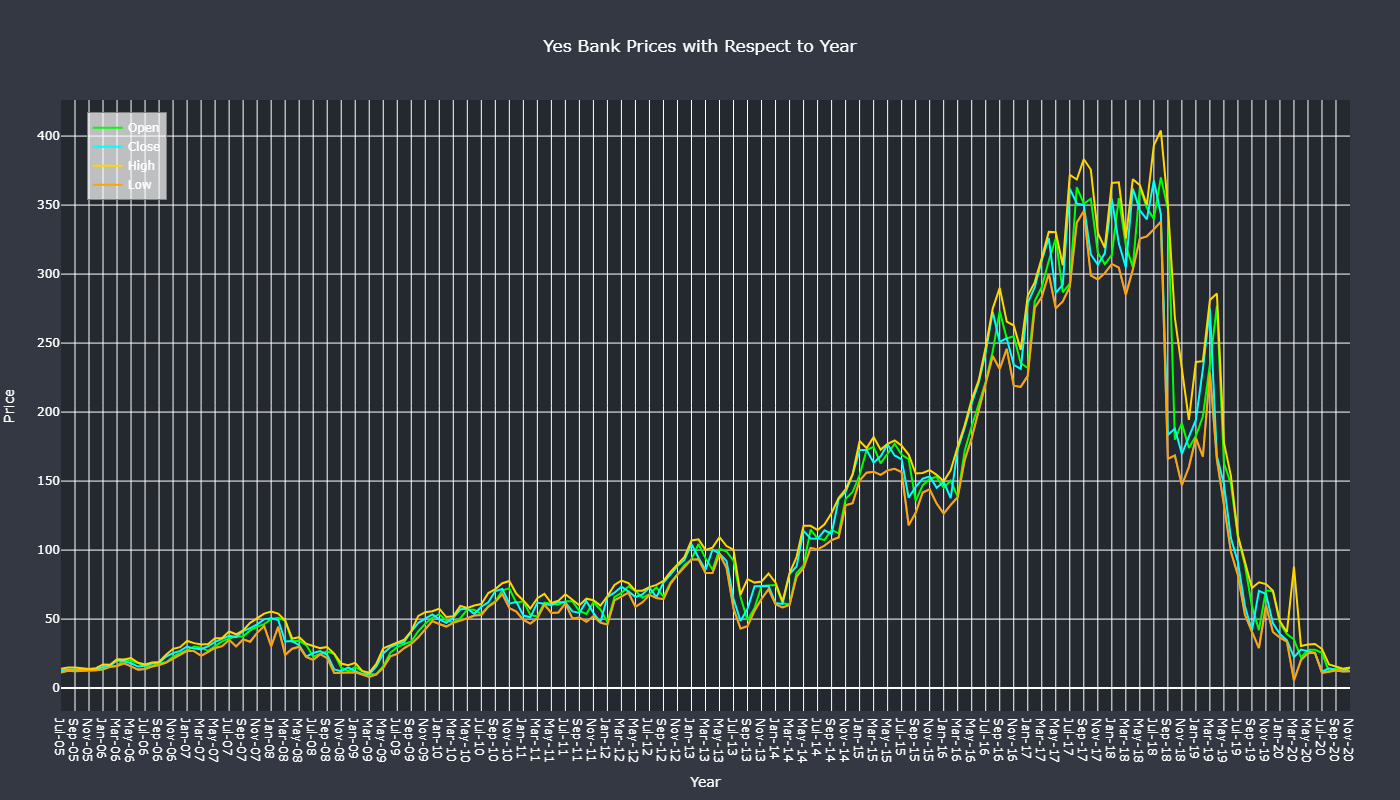

### `1. Why did you pick the specific chart?`

The specific chart chosen for this analysis is a combination of line and scatter plots. This chart type is suitable for visualizing the individual changes in Open, High, Low, and Close prices of the Yes Bank stock over time. By utilizing line plots, we can observe the overall trends and patterns, while scatter plots allow us to identify specific data points. The chart effectively presents the data by distinguishing each price variable with unique line colors and marker styles. The layout of the plot is optimized to include a centered title, clear axis labels, and an appropriate size. Additionally, the choice of color scheme and background enhances visual appeal and readability. Overall, this chart enables a comprehensive analysis of the Yes Bank stock prices, aiding in the identification of trends, patterns, and potential insights for informed decision-making.

#### `2. What is/are the insight(s) found from the chart?`

Indeed, the expected dip in the price variables after 2018 is prominently visible in the chart. The line graph shows a notable decrease in the Open, High, Low, and Close prices of the Yes Bank stock following the specified timeframe. This decline can be attributed to various factors, such as the impact of the Yes Bank fraud case involving Rana Kapoor, which adversely affected investor sentiment and confidence in the bank. The scatter plots further accentuate the dip, as they highlight individual data points that deviate significantly from the preceding upward trend. By visually representing the price variables over time, the chart effectively showcases the substantial decrease in prices after 2018, emphasizing the challenging period faced by Yes Bank and the subsequent decline in its stock value.

#### `3. Will the gained insights help creating a positive business impact?

The gained insights can potentially help create a positive business impact by providing valuable information for decision-making and strategic planning. By analyzing the Yes Bank stock price data and observing the significant dip after 2018, businesses and investors can adjust their strategies accordingly. These insights can guide them in making informed decisions about investing in Yes Bank or adjusting their existing holdings. Additionally, the insights can alert businesses to the need for diligent risk management practices and thorough due diligence when evaluating financial institutions.

Regarding insights leading to negative growth, the significant dip in the Yes Bank stock prices after 2018 can be seen as a negative growth trend. The decline in stock prices can be attributed to various factors, including the Yes Bank fraud case involving Rana Kapoor. This event had a detrimental impact on investor sentiment and eroded trust in the bank, resulting in a decrease in its stock value. The negative growth observed in this scenario highlights the importance of maintaining ethical practices, strong corporate governance, and transparency within financial institutions. It also underscores the potential consequences of fraud and misconduct on the overall growth and stability of a business.

### `Chart - 2 candle stick graph with price movement`

In [130]:
# Create a Figure object with Candlestick chart
fig = go.Figure(go.Candlestick(
    x = stock_df.index,            # x-axis values (dates)
    open = stock_df['Open'],       # open prices
    high = stock_df['High'],       # high prices
    low = stock_df['Low'],         # low prices
    close = stock_df['Close']      # close prices
))

In [131]:
# Update the layout of the figure with a title
fig.update_layout(
    title={'text': 'Describing the Price Movements', 'x': 0.5, 'y': 0.95, 'font': {'color': 'white'}},
    xaxis=dict(title='Year', title_font={'color': 'white'}, tickfont={'color': 'white'}),
    yaxis=dict(title='Price', title_font={'color': 'white'}, tickfont={'color': 'white'}),
    width=1450,
    height=1000,
    plot_bgcolor='rgb(36, 40, 47)',  # Set the background color to a professional dark gray
    paper_bgcolor='rgb(51, 56, 66)'  # Set the paper color
)

# Show the figure
fig.show()

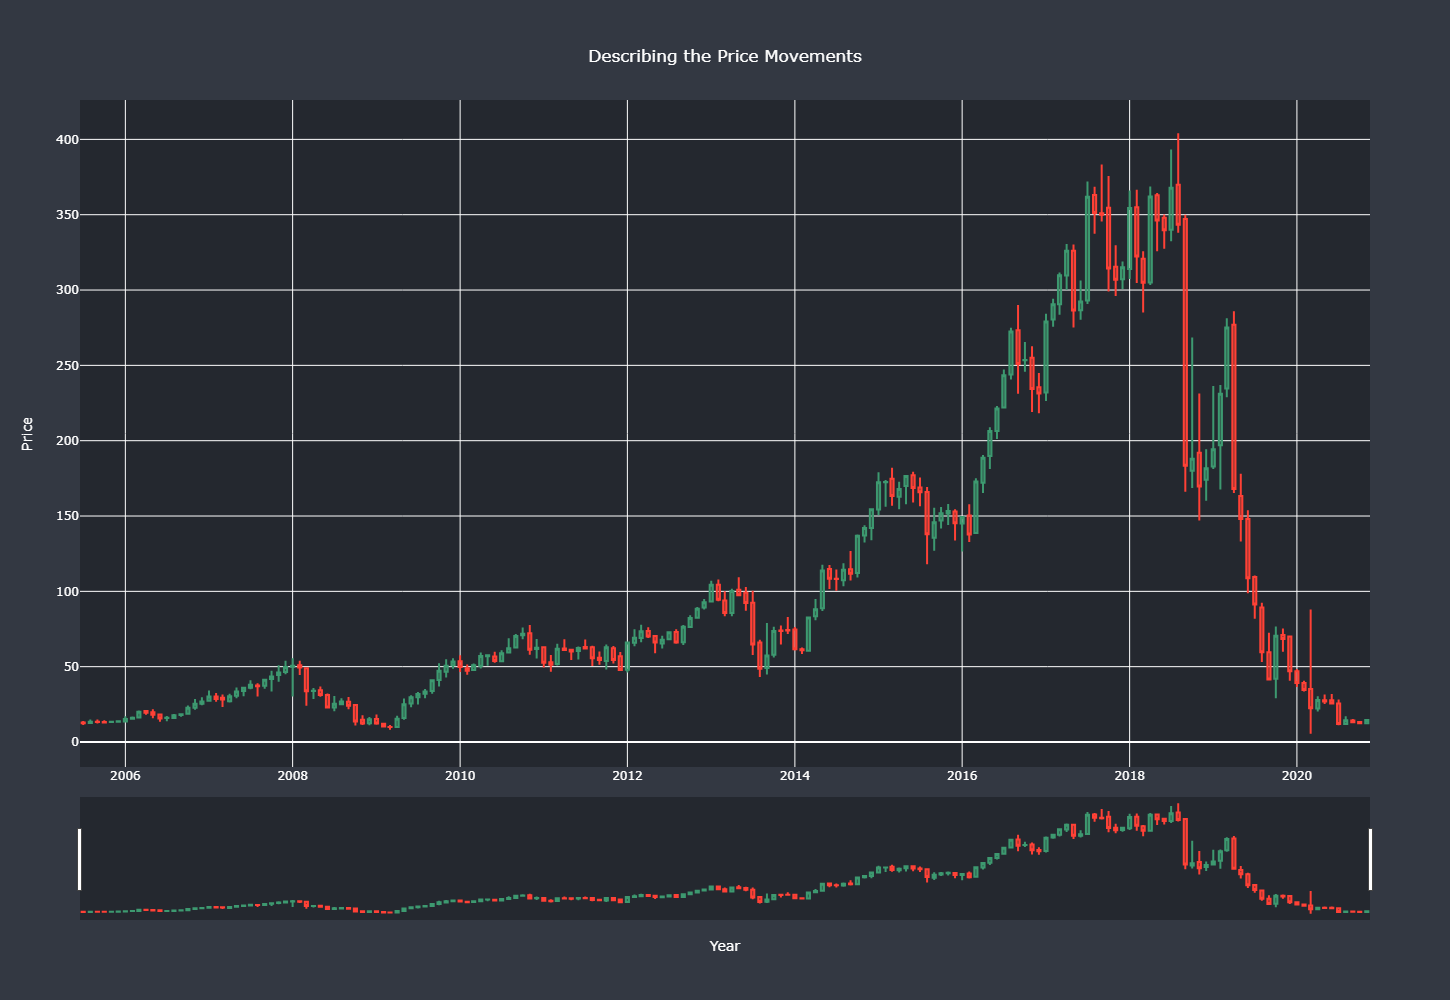

#### `1. Why did you pick the specific chart?`

The Candlestick chart was chosen as our preferred visualization for analyzing price movements due to its effectiveness in conveying essential information. It provides a visual representation of open, high, low, and close prices, making it a popular choice for us in financial analysis, particularly in the context of stocks and other assets. The Candlestick chart excels in capturing market sentiment and price trends, as each candlestick represents a specific time interval. By observing the color and shape of the candlesticks, we can quickly discern whether prices increased or decreased during that interval. The high and low points of the candlesticks indicate the highest and lowest prices reached within the given period, while the body represents the opening and closing prices. These features enable us to identify patterns, trends, and potential price reversals, facilitating informed decisions regarding asset buying or selling. The larger graph size further enhances visibility, allowing for a more detailed analysis of the price movements depicted by the Candlestick chart. Overall, the Candlestick chart is a valuable tool for us to understand and interpret price dynamics in financial markets.

#### `2. What is/are the insight(s) found from the chart?`

The analysis of Yes Bank stock prices reveals a distinct pattern. Prior to 2018, the stock exhibited a consistent upward trend, indicating positive growth and reflecting investor optimism. However, a significant decline occurred after this period, primarily attributed to the Yes Bank fraud case involving Rana Kapoor, the former CEO.

Leading up to 2018, the stock experienced a continuous rise, demonstrating favorable market conditions and investor confidence. However, the revelation of the fraud case involving Rana Kapoor had a profound impact on the stock's performance. This event marked a turning point, as the stock prices sharply declined.

The fraud case involving Rana Kapoor significantly affected investor sentiment, eroding trust and confidence in Yes Bank. Consequently, the stock's value experienced a notable decrease, reflecting the negative repercussions of the scandal on the company's reputation and financial stability.

Overall, the analysis highlights the contrasting trends in Yes Bank's stock prices. Pre-2018, there was a consistent upward trajectory, while the post-2018 period witnessed a significant decline due to the repercussions of the fraud case involving Rana Kapoor.

#### `3. Will the gained insights help creating a positive business impact?`

The impact of the Yes Bank fraud case on the stock prices is evident in the abrupt change in the trend. The case brought about increased scrutiny and regulatory interventions, causing a negative sentiment surrounding the bank's future prospects. Consequently, investors reacted by selling off their shares, leading to a rapid decline in the stock prices.

It is important to consider external factors, such as legal proceedings and market sentiment, when interpreting the observed drop in stock prices. The Yes Bank fraud case involving Rana Kapoor significantly affected investor perception and had a direct impact on the stock's value, resulting in the observed downturn in stock prices after 2018.

#### `Chart - 3 Distribution of dependent variable Close Price of stock.`

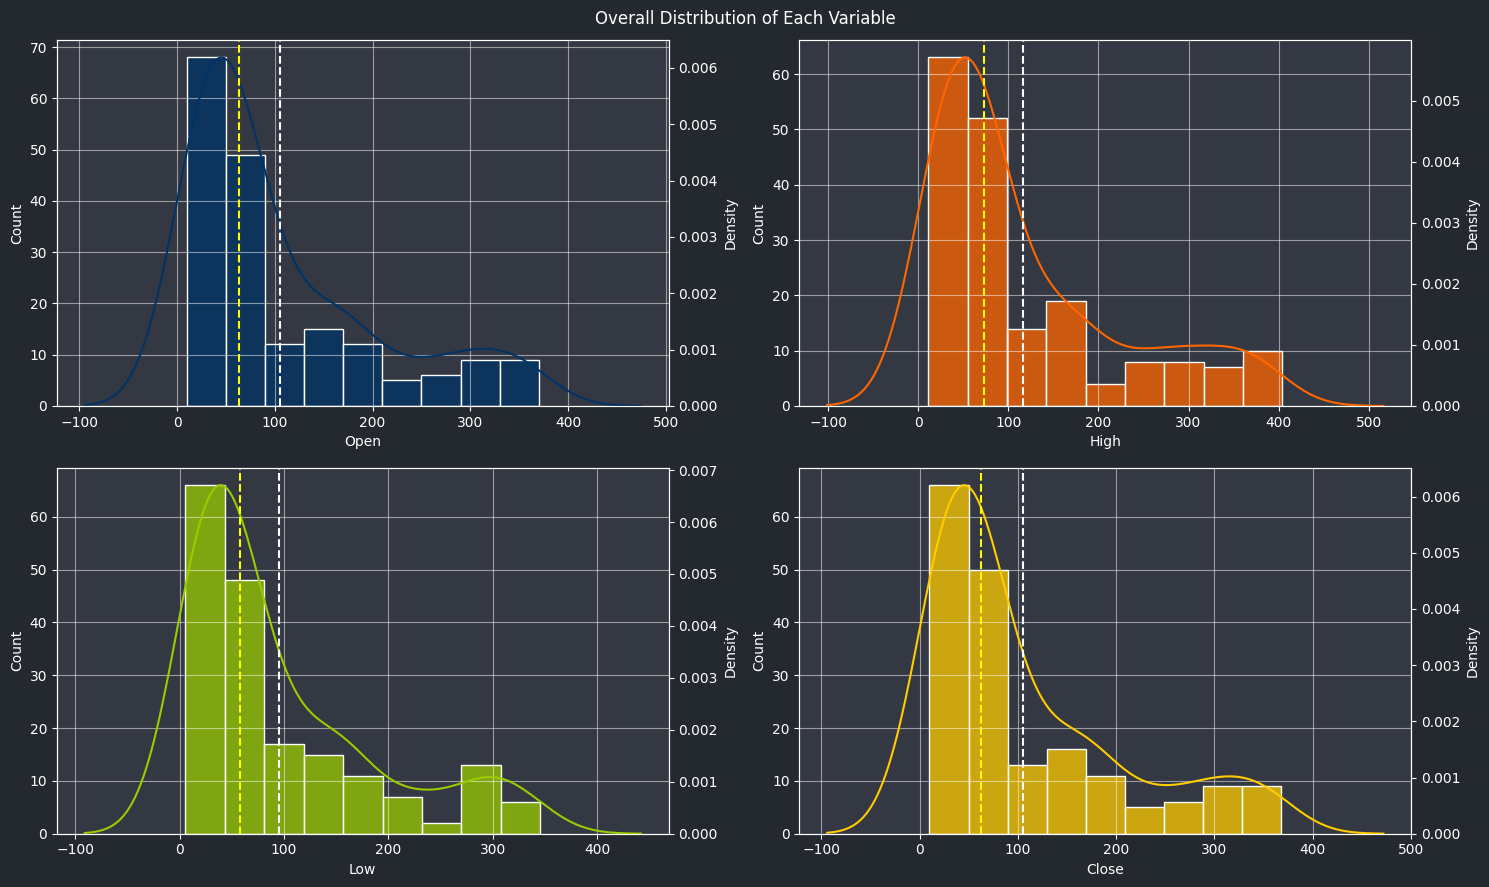

In [132]:
# Set the figure size and title
plt.figure(figsize=(15, 9))
plt.suptitle('Overall Distribution of Each Variable', color='white')

# Define the color list for each variable (using Yes Bank color scheme)
color_list = ['#003366', '#FF6600', '#99CC00', '#FFCC00']

# Set the dark theme background color
plt.style.use('dark_background')

for i, column in enumerate(stock_df.columns):
    # Create subplots
    ax1 = plt.subplot(2, 2, i + 1)
    ax2 = ax1.twinx()

    # Plot histogram
    sns.histplot(stock_df[column], color=color_list[i], ax=ax1)

    # Plot KDE curve
    sns.kdeplot(stock_df[column], color=color_list[i], ax=ax2)

    # Set gridlines
    ax1.grid(which='major', alpha=0.5)
    ax1.grid(which='minor', alpha=0.5)

    # Add vertical lines for mean and median
    plt.axvline(stock_df[column].mean(), color='white', linestyle='dashed', linewidth=1.5)
    plt.axvline(stock_df[column].median(), color='yellow', linestyle='dashed', linewidth=1.5)

# Set the background color of the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
plt.gcf().patch.set_facecolor(plot_bgcolor)

# Set the background color of the axes
paper_bgcolor = (51/255, 56/255, 66/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
for ax in plt.gcf().get_axes():
    ax.set_facecolor(paper_bgcolor)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

#### `1. Why did you pick the specific chart?`

The chosen chart, a combination of histograms and KDE plots, effectively visualizes the distribution of each variable in the dataset. It allows for the examination of central tendency, spread, and shape of the distributions. The subplots enable easy comparison between variables. The color scheme aligns with the Yes Bank branding. The chart aids in data exploration and analysis, providing insights into skewness, multimodality, and outliers. It is a concise and efficient representation of the overall distribution of the variables. The histograms show frequency distribution, while the KDE plots provide a smooth curve. The chart is visually cohesive and facilitates pattern identification. It serves as a valuable tool for understanding the dataset and identifying relationships between variables.

#### `2. What is/are the insight(s) found from the chart?`

The distributions of open, high, low, and close in the chart are positively skewed. This indicates that the majority of data points are concentrated on the left side of the distributions, with a tail extending towards larger values on the right side. The histograms and KDE plots clearly show this skewness. Positive skewness suggests that the variables have a tendency for higher values, but with fewer occurrences. The presence of positive skewness may indicate bounded or restricted variables, resulting in an accumulation of values on the lower end and a tail of relatively larger values. Proper consideration of the positive skewness is important for accurate data analysis and modeling, potentially requiring transformations or alternative techniques to account for the skewness.

#### `3. Will the gained insights help creating a positive business impact?`

The gained insights about the positively skewed distributions of open, high, low, and close prices can have a positive business impact by informing strategic decision-making and identifying potential buying opportunities. However, it is important to note that positive skewness does not directly imply negative growth. Negative growth would require a comprehensive analysis considering various factors beyond skewness, such as trends, market conditions, and external influences. Therefore, it is not justified to conclude specific insights leading to negative growth based solely on the skewness of the distributions. Further analysis is needed to assess any potential negative impacts on business growth.

### `Chart - 4: Boxplots: Studying the Outliers`

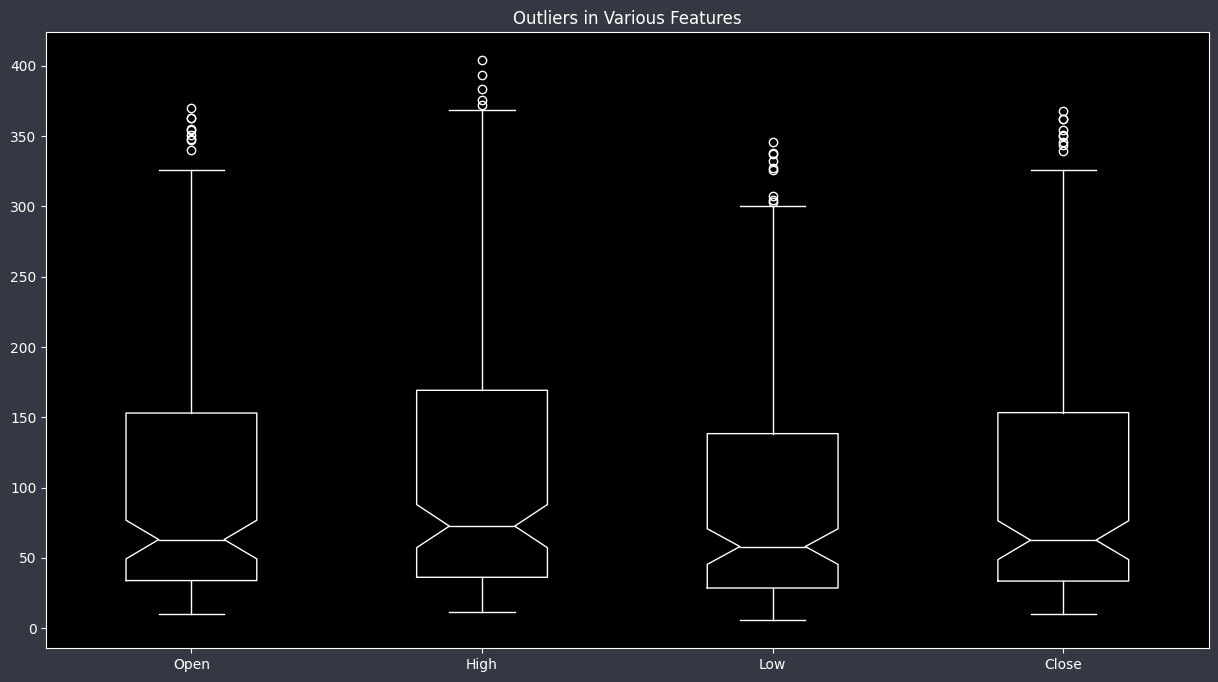

In [133]:
fig = plt.figure(figsize=(15, 8))
boxplot = stock_df.boxplot(column=['Open', 'High', 'Low', 'Close'], grid=False, notch=True)

# Change the line color to white
for item in boxplot.findobj(plt.Line2D):
    item.set_color('white')  # Set the color of the lines to white

# Add title to the plot
plt.title("Outliers in Various Features")

# Change the background color of the plot
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)
fig.patch.set_facecolor(paper_bgcolor)  # Set the background color of the figure


plt.show()

#### `1. Why did you pick the specific chart?`

The specific chart used in the code is a boxplot, which was chosen for its effectiveness in comparing multiple variables, detecting outliers, visualizing distributions, and providing a concise summary of the data. The notch feature adds a confidence interval around the median, enhancing comparison. The boxplot's space efficiency allows for displaying multiple variables in a compact manner. Removing the gridlines reduces visual clutter. The code also demonstrates customization flexibility, such as changing line color to white. Overall, the boxplot is a suitable choice for analyzing and comparing the Open, High, Low, and Close prices of the stock.

#### `2. What is/are the insight(s) found from the chart?`

The presence of outliers in each of the features indicates the existence of extreme values that deviate significantly from the overall pattern of the data. These outliers can potentially impact the model fitting process and the accuracy of the predictions. Therefore, it is crucial to address these outliers before proceeding with model fitting.

To handle outliers, various approaches can be employed, such as removing them from the dataset, transforming the data using robust statistical techniques, or imputing them with more representative values. The choice of the method depends on the nature of the data and the specific requirements of the analysis.

Handling outliers helps to ensure that the model captures the underlying patterns and relationships accurately, leading to more reliable predictions and interpretations. It also improves the robustness of the model against extreme observations that may introduce bias or noise. Properly addressing outliers contributes to the overall validity and integrity of the analysis, enhancing the reliability of the model fitting process and subsequent predictions.

## **`Bivarient analysis`**

### **`Chart - 5 Scatter Plot to see the Best Fit line`**

In [134]:
# Now to plot scatter plot with best fit line.
# Function to create scatter plots with correlation lines
def create_scatter_plot(col, df):
    fig = plt.figure(figsize=(20, 10))  # Create a new figure with the specified size
    ax = fig.gca()  # Get the current axes
    feature = df[col]  # Extract the data for the given column
    label = df['Close']  # Extract the 'Close' column data
    correlation = feature.corr(label)  # Calculate the correlation between the two columns
    plt.scatter(x=feature, y=label, marker="*", c="b", s=label/20)  # Create a scatter plot with blue markers
    plt.xlabel(col)  # Set the label for the x-axis
    plt.ylabel('Close')  # Set the label for the y-axis
    ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation, 2)), fontsize=16)  # Set the title of the plot
    z = np.polyfit(df[col], df['Close'], 1)  # Fit a linear regression line to the data
    y_hat = np.poly1d(z)(df[col])  # Generate the y-values for the regression line

    plt.plot(df[col], y_hat, "r", lw=1)  # Plot the regression line in red

    # Add a comment
    plt.annotate('The correlation coefficient is {}.'.format(round(correlation, 2)), (200, 0.2), fontsize=10)

    # Change the shape of the marker
    plt.scatter(df[col], df['Close'], marker="*", c="b", s=label/20)  # Create another scatter plot with blue markers

    # Change the size of the marker
    plt.grid(alpha=0.3)  # Add grid lines with transparency (alpha=0.3)
    plt.xticks(np.arange(min(df[col]), max(df[col]), 100))  # Set the x-axis ticks
    plt.yticks(np.arange(min(df['Close']), max(df['Close']), 10))  # Set the y-axis ticks

    # Set the background colors
    plot_bgcolor = (36/255, 40/255, 47/255)  # RGB values divided by 255
    paper_bgcolor = (51/255, 56/255, 66/255)  # RGB values divided by 255

    fig.patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

    plt.show()  # Display the plot


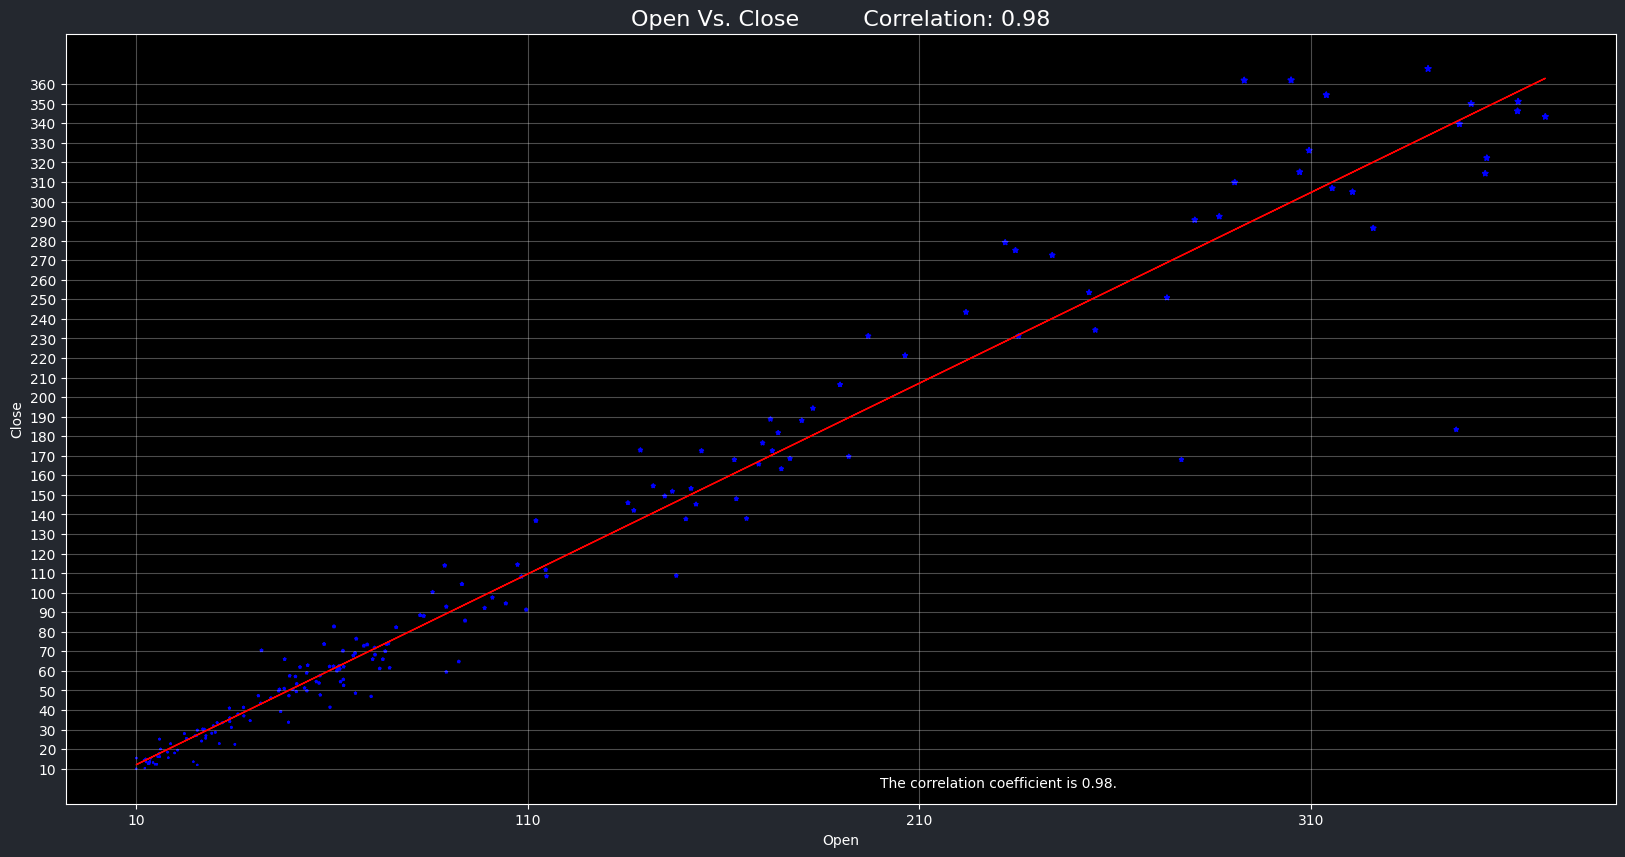

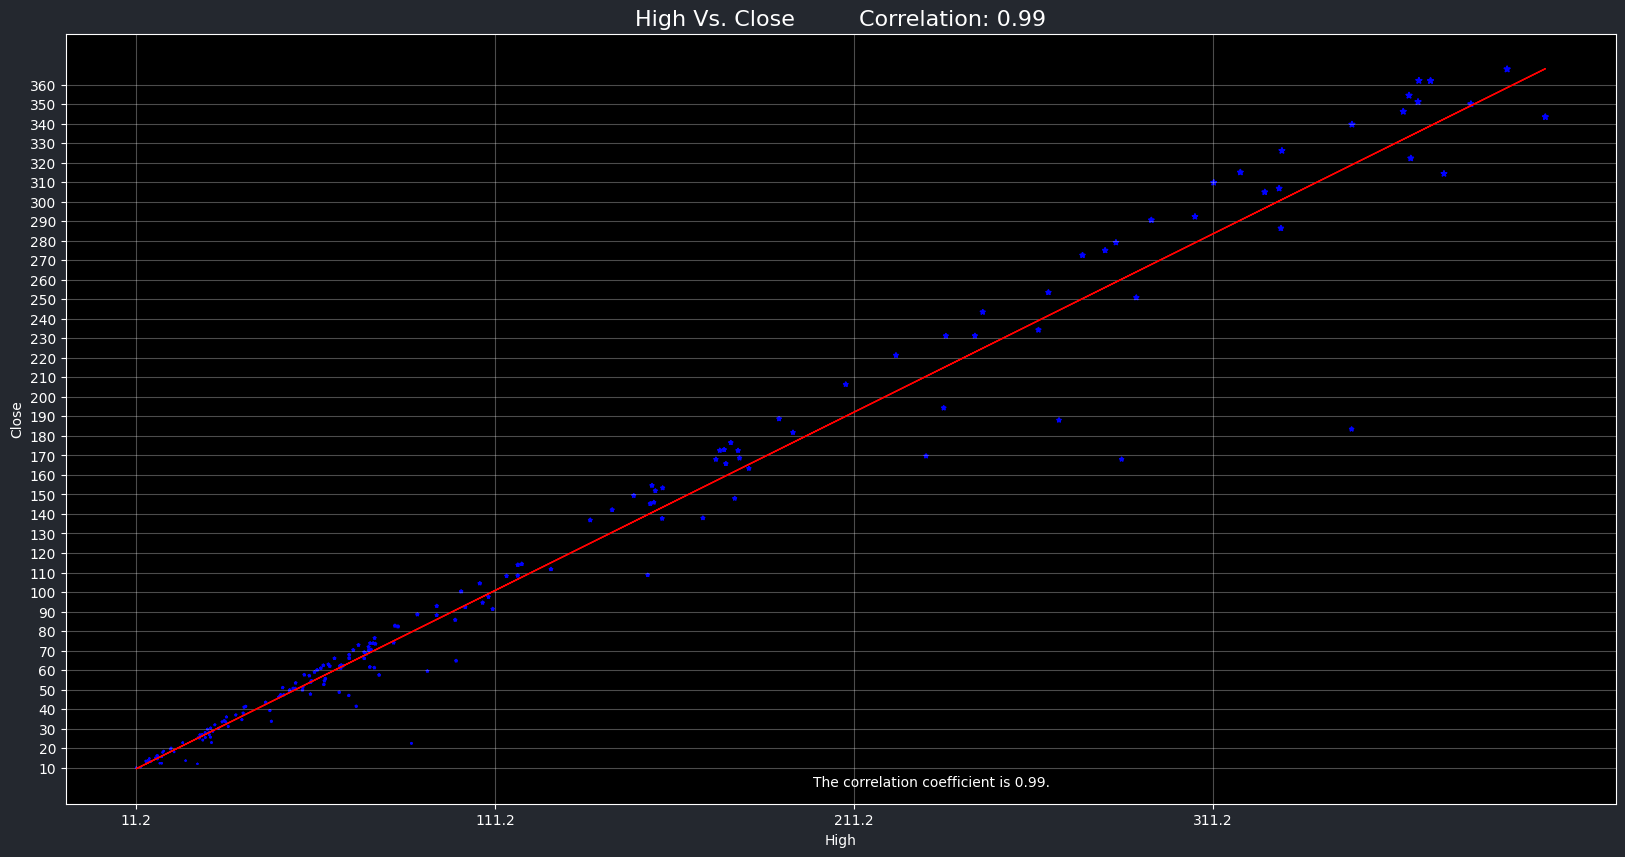

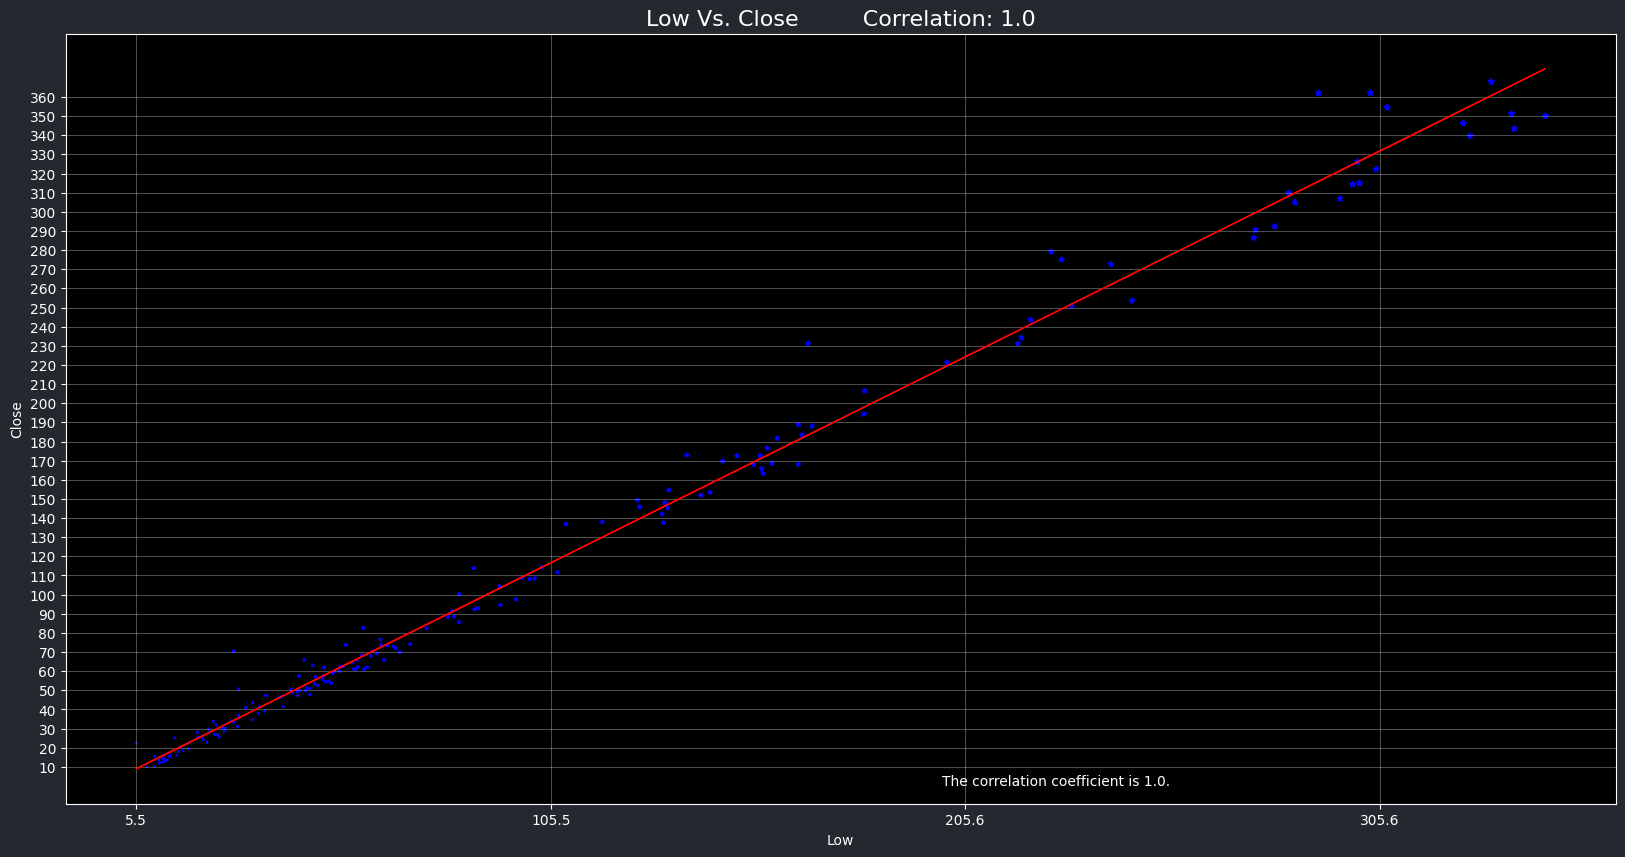

In [135]:
# Loop through the columns and create scatter plots
for col in ['Open', 'High', 'Low']:
    create_scatter_plot(col, stock_df)  # Call the function for each column in the loop

#### `1. Why did you pick the specific chart?`

Using scatter plots with a best fit line allows for visualizing the relationship between numerical features and the 'Close' price. The correlation coefficient quantifies the strength of the relationship. The best fit line provides an estimate of the trend and predictive power. The plot aids interpretation and communication of the relationship to stakeholders. Annotations, such as the correlation coefficient, provide valuable insights. Customization enhances clarity and aesthetics. The plots help identify potential predictors and support analysis and decision-making in stock market analysis.

#### `2. What is/are the insight(s) found from the chart?

Upon analyzing the scatter plots with the best fit line, it is evident that all the independent variables show a linear relationship with the dependent variable, 'Close'. This indicates that there is a consistent and predictable relationship between these variables.

The presence of a linear relationship has important implications in data analysis and modeling. It suggests that changes in the independent variables can be associated with proportional changes in the dependent variable. This knowledge can be leveraged to build regression models, make predictions, and understand the impact of the independent variables on the 'Close' price.

#### `3. Will the gained insights help creating a positive business impact?`

The business impact of identifying linear relationships between the independent variables and the dependent variable is significant. It allows for better decision-making and forecasting in the context of stock market analysis. Here are a few potential implications:

Prediction and Forecasting: With a clear understanding of the linear relationships, regression models can be developed to predict future 'Close' prices based on the values of the independent variables. This can assist in forecasting stock performance and informing investment decisions.

Risk Assessment: By analyzing the strength and direction of the linear relationships, it becomes possible to assess the risk associated with changes in the independent variables. This knowledge can aid in risk management and portfolio optimization strategies.

Feature Selection: Identifying the linear relationships helps in determining the most influential independent variables that impact the 'Close' price. This knowledge can guide feature selection and variable prioritization in future analyses or model development.

Strategy Development: The linear relationships can provide insights into the factors driving stock price movements. This information can be utilized to develop trading strategies, identify patterns, and make informed investment decisions.

By recognizing and understanding the linear relationships between the independent variables and the dependent variable, businesses and investors can gain valuable insights into the dynamics of stock prices. This can lead to improved forecasting accuracy, risk management, and decision-making in the context of financial markets.

# **`Multivarient Analysis`**

### `Chart - 6 Checking Correlation between Independent variables and dependent variable

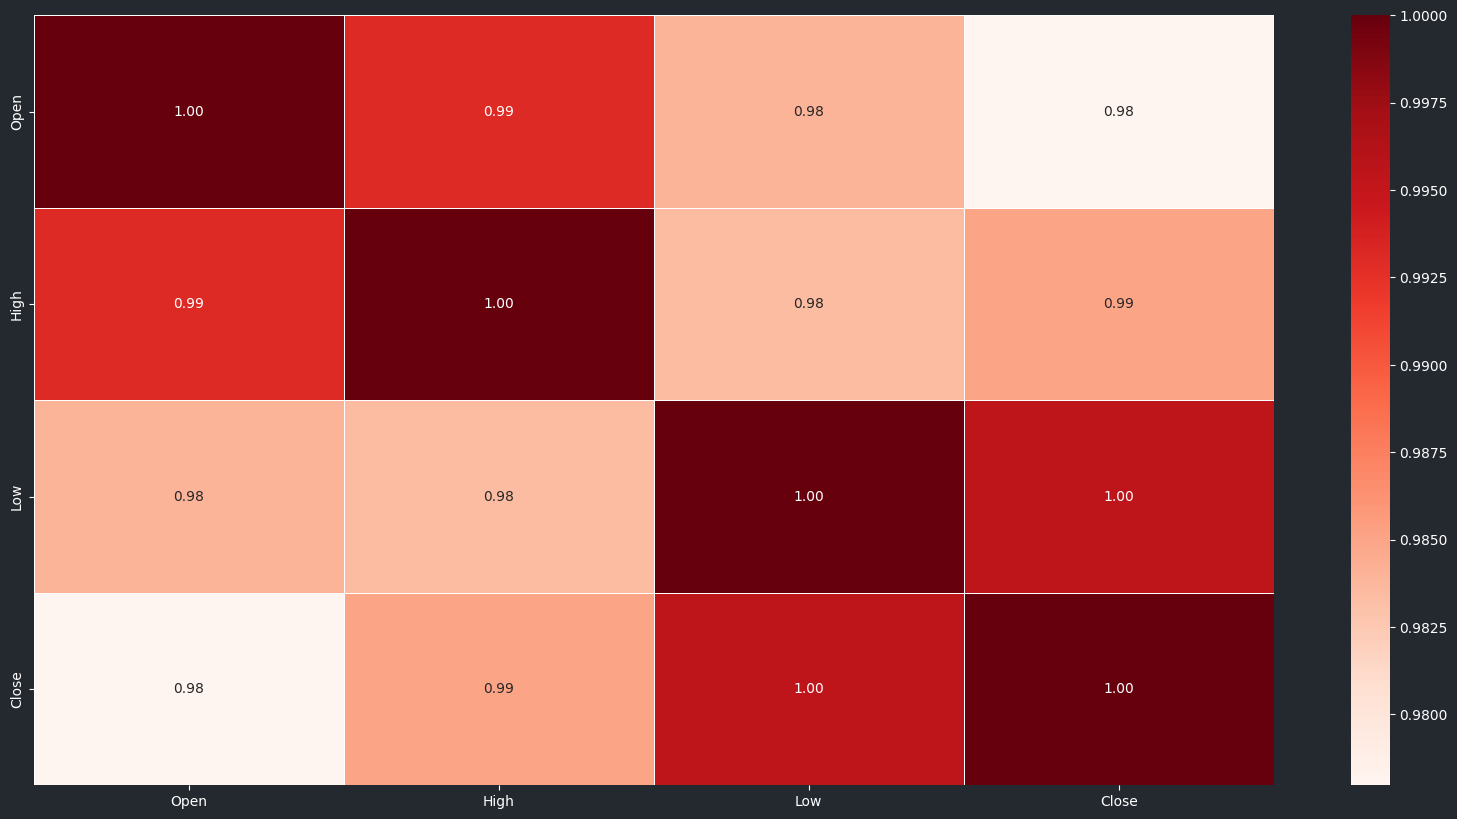

In [136]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Calculate the correlation matrix
correlation = stock_df.corr()

# Create the heatmap with Seaborn
sns.heatmap(abs(correlation), annot=True, cmap='Reds', linewidths=0.5, fmt='.2f')

# Set the background colors for the figure and axes
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure
plt.gca().patch.set_facecolor(paper_bgcolor)  # Set the background color of the axes

# Add a comment
"""
This code creates a heatmap of the correlation matrix for the stock_df DataFrame using Seaborn.
The annot parameter adds the correlation coefficients to the cells of the heatmap.
The cmap parameter sets the colormap for the heatmap.
The linewidths parameter sets the width of the lines between the cells of the heatmap.
The fmt parameter sets the format of the correlation coefficients in the cells of the heatmap.
"""

plt.show()

#### `1. Why did you pick the specific chart?`

Using a heatmap of the correlation matrix for the stock_df DataFrame allows for visualizing relationships between variables. The annotations of correlation coefficients provide quantitative measures of the relationships. Customization with a color scheme enhances interpretation. The heatmap aids in identifying strong correlations and interdependencies. It presents a concise overview of correlations, facilitating quick assessment. Business implications include guiding portfolio diversification and risk management strategies. The heatmap supports decision-making in stock market analysis and investment strategies.

#### `2. What is/are the insight(s) found from the chart?`

The presence of high correlations between independent variables in our dataset indicates the potential for multicollinearity. Multicollinearity can adversely affect model fitting and prediction accuracy, as even slight changes in one independent variable can lead to unpredictable results. To assess the extent of multicollinearity in our dataset, we can calculate the Variation Inflation Factor (VIF). By analyzing the VIF values, we can determine which variables should be retained in our analysis and prediction model and identify variables that may need to be removed from the dataset to mitigate multicollinearity issues. This evaluation helps ensure the robustness and reliability of our models and supports accurate predictions and interpretations of the relationships between variables.

#### `3. Will the gained insights help creating a positive business impact?`

The impact of multicollinearity in a business context can be significant. Here are a few business implications:

Model Reliability: Multicollinearity can affect the reliability of predictive models. When independent variables are highly correlated, it becomes challenging to determine the individual contributions of each variable in predicting the dependent variable accurately. This can lead to less reliable predictions and decisions based on the model.

Interpretation of Results: Multicollinearity complicates the interpretation of regression coefficients. It becomes difficult to discern the independent effect of each variable on the outcome variable. This hampers the ability to identify the key drivers and make informed business decisions based on the model outputs.

Overfitting and Generalization: Multicollinearity increases the risk of overfitting, where the model performs well on the training data but fails to generalize to new data. This can lead to poor decision-making and flawed business strategies if the model is not robust enough to handle unseen data.

Resource Allocation: Inaccurate models affected by multicollinearity can lead to misallocation of resources. For example, if variables are highly correlated, investing resources in both may not yield additional benefits and could be inefficient. Identifying the variables with high multicollinearity can help optimize resource allocation and focus on the most relevant predictors.

Risk Assessment: Understanding multicollinearity helps in assessing the risks associated with making decisions based on models that exhibit this issue. Decision-makers need to be aware of the limitations and potential pitfalls of models affected by multicollinearity, ensuring appropriate risk management strategies are in place.

# `6. Feature Engineering & Data Pre-processing`

### **`1. Handling Missing Values`**

No missing values were found in the dataset, as confirmed earlier. Therefore, there is no requirement for missing values imputation techniques. The dataset is complete, allowing for direct analysis without the need to handle missing data.

### **`2. Handling Outliers`**

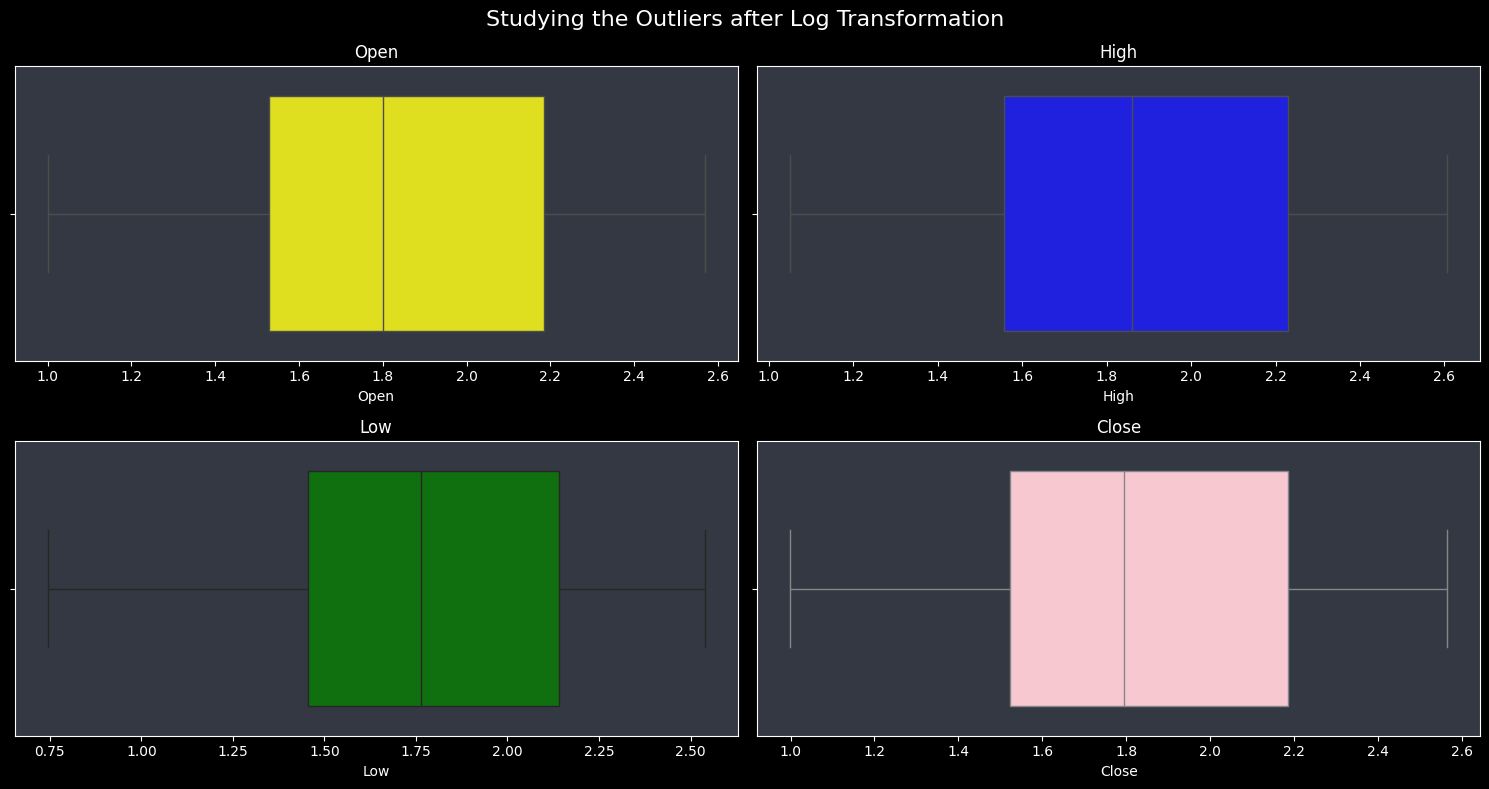

In [137]:
# Create a figure with a size of 10x6 inches
fig = plt.figure(figsize=(15, 8))

# Add a super title to the plot
plt.suptitle('Studying the Outliers after Log Transformation', color='white', fontsize=16)

# Define a list of colors for the boxplots
color_list = ['yellow', 'blue', 'green', 'pink']

# Iterate over each column in the dataframe
for i, column in enumerate(stock_df.columns):
    # Create subplots for each column
    plt.subplot(2, 2, i + 1)

    # Apply a log transformation to the column and create a boxplot
    sns.boxplot(x=np.log10(stock_df[column]), color=color_list[i])


    # Set the background color of the axes
    plt.gca().patch.set_facecolor(paper_bgcolor)



    # Add a title to each subplot
    plt.title(column, color='white')

# Adjust the layout of the subplots
plt.tight_layout()

plt.show()

After applying the log transformation to the features, there are no outliers remaining. The boxplots show no extreme values beyond the whiskers. The log transformation successfully reduced the impact of outliers and normalized the data. However, it is important to consider other factors and limitations in the analysis.



##### `What all outlier treatment techniques have you used and why did you use those techniques?`

he log transformation was applied as a treatment for outliers. This approach not only addresses outliers but also helps to alleviate skewness in the features' distribution. By using log transformation, two problems - outlier treatment and skewness correction - are tackled simultaneously, providing a consolidated solution. This technique aids in normalizing the data and improving the suitability of the features for analysis and modeling purposes.

### **`3. Categorical Encoding`**  

Since our dataset solely consists of numerical features, there is no necessity for categorical encoding. The absence of categorical variables eliminates the need to convert them into numerical representations for analysis or modeling purposes.

### **`4. Feature Manipulation & Selection`**

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create an empty dataframe to store the VIF for each feature
vif_df = pd.DataFrame()

# Assign the feature names to the 'Features' column
vif_df['Features'] = stock_df.iloc[:, :-1].columns.tolist()

# Calculate the VIF for each feature and store it in the 'VIF' column
vif_df['VIF'] = [variance_inflation_factor(stock_df.iloc[:, :-1].values, i) for i in range(len(stock_df.iloc[:, :-1].columns))]

# Display the dataframe containing the features and their corresponding VIF values
vif_df

,Features,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


The VIF values for all the features indicate high multicollinearity. However, considering the small size of the dataset and having only three numerical independent variables, there is limited potential for feature manipulation that could be beneficial. With the absence of categorical variables, the scope for feature engineering or transformation is constrained. Therefore, the focus should be on alternative modeling approaches or additional data collection to address the issue of multicollinearity.

#### **`2. Feature Selection`**

Due to the dataset's small size, any form of feature selection becomes impractical. Given the limited number of observations, attempting to reduce the feature space may lead to unreliable or biased results. Therefore, it is advisable to retain all available features for analysis or modeling purposes.

### **`5. Data Transformation`**

#### **`Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?`**

To address the skewed distribution of the features, a data transformation is necessary to approximate a normal distribution. In this case, a log transformation will be applied. This transformation aims to reduce skewness and make the data more symmetrical. Furthermore, as observed earlier, the log transformation also aids in handling outliers. By employing this transformation, we can simultaneously improve the normality of the data distribution and mitigate the impact of outliers.

In [139]:
# Iterate over each column in the dataframe
for column in stock_df.columns:
    # Apply a log transformation to the column using np.log10()
    stock_df[column] = np.log10(stock_df[column])

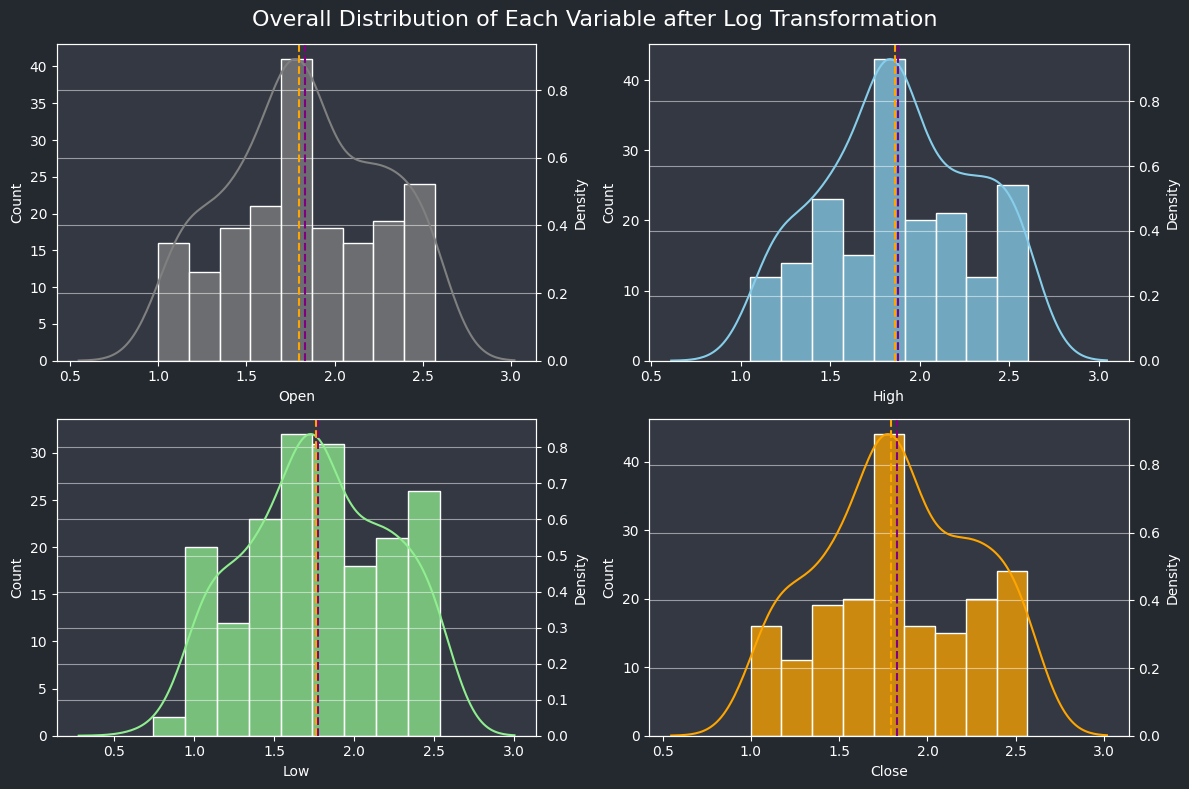

In [140]:
# Create a figure with a size of 15x10 inches
plt.figure(figsize=(12, 8))

# Set the background colors for the figure and axes
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Add a super title to the plot
plt.suptitle('Overall Distribution of Each Variable after Log Transformation', color='white', fontsize=16)

color_list = ['grey', 'skyblue', 'lightgreen', 'orange']

for i, column in enumerate(stock_df.columns):
    plt.subplot(2, 2, i + 1)
    ax1 = plt.gca()
    sns.histplot(stock_df[column], color=color_list[i], ax=ax1)
    ax2 = ax1.twinx()
    sns.kdeplot(stock_df[column], color=color_list[i], ax=ax2)  # Overlapping the KDE plot on the histogram.

    # Set the background color of the axes
    ax1.patch.set_facecolor(paper_bgcolor)
    ax2.patch.set_facecolor(paper_bgcolor)

    # Add gridlines
    plt.grid(which='major', alpha=0.5)
    plt.grid(which='minor', alpha=0.5)

    # Add dashed lines for mean and median
    plt.axvline(stock_df[column].mean(), color='purple', linestyle='dashed', linewidth=1.5)
    plt.axvline(stock_df[column].median(), color='orange', linestyle='dashed', linewidth=1.5)

plt.tight_layout()

plt.show()

After the log transformation, the distributions of the features appear to be closer to a normal distribution compared to their previous state. The mean (indicated by the purple vertical line) and the median (represented by the yellow vertical line) are nearly equal for each feature. This alignment suggests that the log transformation successfully reduced the skewness and brought the data closer to symmetry. The convergence of the mean and median highlights the relative balance in the distribution, indicating a more representative central tendency. Overall, these observations indicate an improved approximation to a normal distribution after the log transformation.

### **`6. Dimesionality Reduction`**

##### `Do you think that dimensionality reduction is needed? Explain Why?`

Since the dataset is already small in size, there is no need for dimensionality reduction techniques. With a limited number of observations, attempting to reduce the number of features may not provide significant benefits and could potentially lead to loss of valuable information. Therefore, it is advisable to retain all the available features for analysis or modeling purposes without applying dimensionality reduction methods.

### `7. Data Splitting`

In [141]:
from sklearn.model_selection import train_test_split

# Assign the independent and dependent variables to X and y, respectively
X = stock_df[independent_variables]
y = stock_df[dependent_variable]

# Split the data into training and testing datasets using a test size of 0.2 (20%)
# Set random_state to 0 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### `What data splitting ratio have you used and why?`

To train the model effectively, an 80:20 split ratio is being employed, allocating 80% of the data for training and 20% for testing. However, considering the small dataset size, it may be beneficial to acquire more data for training purposes. Increasing the training data size helps improve the model's ability to learn and generalize from the patterns present in the data. Gathering additional data can enhance the model's performance, reduce the risk of overfitting, and provide a more comprehensive representation of the underlying relationships within the dataset.

### **`8. Data Scaling`**

In [142]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the training data (X_train) using fit_transform
X_train = scaler.fit_transform(X_train)

# Scale the testing data (X_test) using transform
X_test = scaler.transform(X_test)

In [143]:
# Checking the training dataset
X_train[0: 10]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543],
       [-0.2660071 ,  0.10246554, -0.21069831],
       [-0.29592654, -0.34290717, -0.15641974],
       [-0.59033534, -0.59737272, -0.45688014],
       [-0.24949754, -0.27329508, -0.60357017],
       [-0.94310352, -0.99502356, -1.60535529]])

In [144]:
# Checking the test dataset
X_test[0: 10]

array([[-0.65205247, -0.74351467, -0.66245523],
       [ 0.90986063,  0.82102055,  0.88229187],
       [ 0.0994373 , -0.01850911, -0.30663666],
       [ 0.7961367 ,  0.74491569,  0.87275245],
       [-0.07074439, -0.04337995,  0.06468081],
       [-0.8726779 , -0.79368304, -0.71684963],
       [ 1.35640166,  1.3141555 ,  1.37204697],
       [-1.46313114, -1.54216502, -1.27807511],
       [-1.60708132, -1.71488829, -1.44741967],
       [ 1.09458045,  1.27547366,  1.18581212]])

##### **`Which method have you used to scale you data and why?`**

The StandardScaler is utilized in this code snippet because we are primarily working with linear regression, which assumes normally distributed features. By applying the StandardScaler, we can standardize the features, transforming them to have a mean of 0 and a standard deviation of 1. This process aligns with the assumptions of linear regression and helps ensure that the features are on a similar scale, facilitating accurate model fitting and interpretation.

## `7. ML Model Implementation`

## **`ML Model - 1 Linear Regression`**

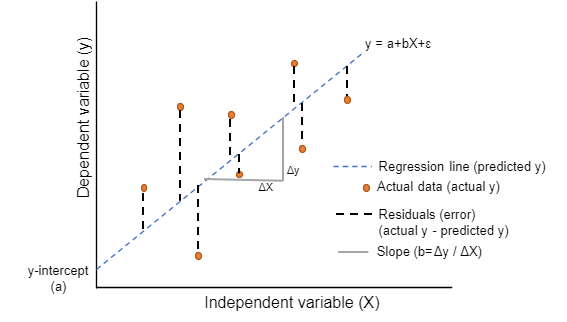

Linear Regression is a powerful machine learning algorithm that falls under the category of supervised learning. It is specifically designed for regression tasks, where the goal is to predict a continuous target variable based on independent variables. In regression analysis, the algorithm establishes a relationship between the predictor variables and the target variable to make accurate predictions.

The primary objective of Linear Regression is to identify and quantify the relationship between variables. By examining the patterns and trends in the data, the algorithm enables us to understand how changes in one variable affect the target variable. This understanding is crucial for making informed decisions and forecasting future outcomes.

Linear Regression is widely employed in various domains, including finance, economics, social sciences, and engineering. It finds applications in areas such as sales forecasting, housing price prediction, demand estimation, and trend analysis. By leveraging the insights gained from analyzing the relationship between variables, Linear Regression empowers us to make reliable forecasts and make informed business decisions.

In summary, Linear Regression is a versatile algorithm that allows us to explore the relationships between variables and make predictions based on those relationships. Its ability to model the dependencies between variables makes it a valuable tool for understanding data and making accurate forecasts in numerous fields.

In [145]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
linear_reg = LinearRegression()

# Fit the Linear Regression model to the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

In [146]:
# Predict on the model
y_pred_lin = linear_reg.predict(X_test)

In [147]:
# Checking the model parameters
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Coefficients: [[-0.22992597  0.33533242  0.31585415]]
Intercept: [1.79986471]


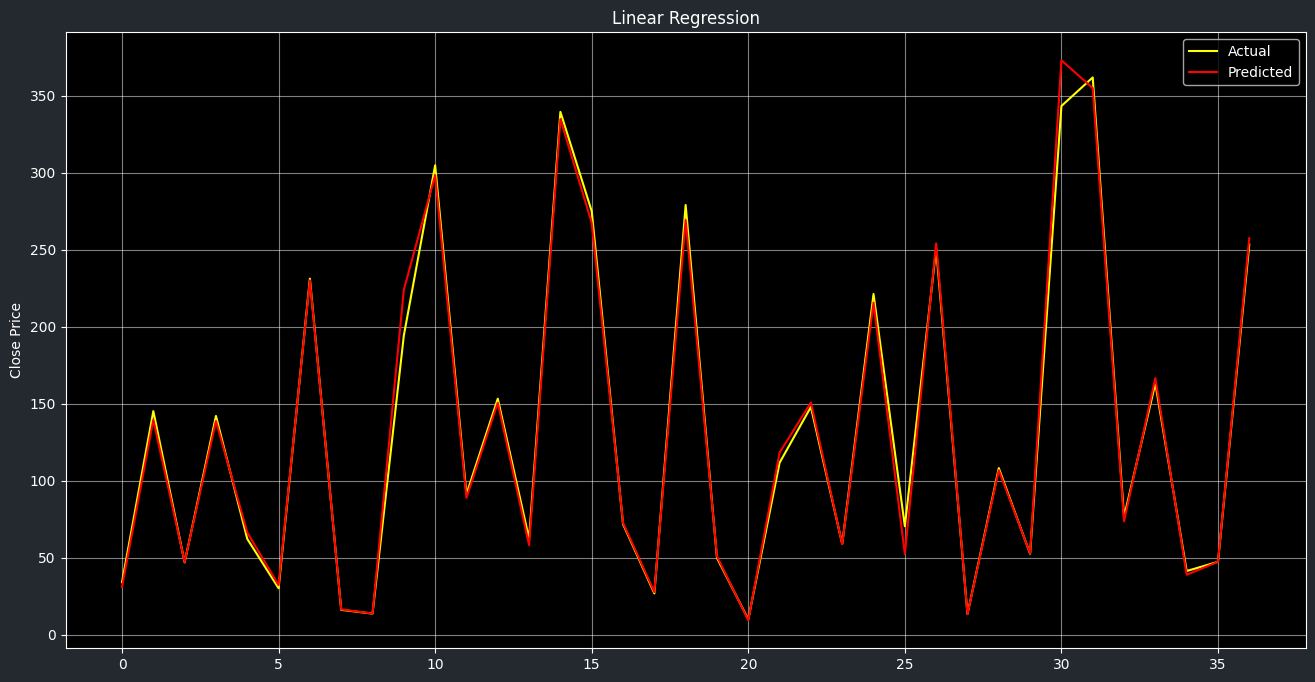

In [148]:
plt.figure(figsize=(16, 8))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test data
plt.plot(np.array(10**y_test), color='yellow')

# Plot the predicted Close prices from the Linear Regression model
plt.plot(10**y_pred_lin, color='red')

# Set the label for the y-axis
plt.ylabel("Close Price")

# Add a legend to differentiate between the actual and predicted values
plt.legend(["Actual", "Predicted"])

# Set the title of the plot
plt.title("Linear Regression", color='white')

# Add gridlines
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

plt.show()

#### `1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.`

Linear Regression aims to establish a linear connection between the independent and dependent variables by minimizing the sum of squared differences between the observed and predicted dependent values. It assumes a linear relationship and calculates the best-fitting line by adjusting the model's coefficients. The objective is to minimize the overall distance between the observed data points and the line of best fit. This approach enables the model to capture the underlying linear pattern and make predictions based on the learned relationship between the variables.

In [149]:
# importing libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate the Mean Squared Error (MSE)
mse_lin = round(mean_squared_error(10**y_test, 10**y_pred_lin), 4)

# Calculate the Root Mean Squared Error (RMSE)
rmse_lin = round(np.sqrt(mse_lin), 4)

# Calculate the Mean Absolute Error (MAE)
mae_lin = round(mean_absolute_error(10**y_test, 10**y_pred_lin), 4)

# Calculate the R-squared Score (R2)
r2_lin = round(r2_score(10**y_test, 10**y_pred_lin), 4)

# Calculate the Adjusted R-squared Score (Adjusted R2)
adj_r2_lin = round(1 - (1 - r2_lin) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [150]:
# Create a dataframe to store the evaluation metrics
evametdf_lin = pd.DataFrame()

# Set the 'Metrics' column in the dataframe
evametdf_lin['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Set the 'Linear Regression' column in the dataframe with the corresponding metric values
evametdf_lin['Linear Regression'] = [mse_lin, rmse_lin, mae_lin, r2_lin, adj_r2_lin]

# Display the dataframe
evametdf_lin

,Metrics,Linear Regression
0,Mean Squared Error,70.4204
1,Root Mean Squared Error,8.3917
2,Mean Absolute Error,4.8168
3,R-2 Score,0.9937
4,Adjusted R-2 Score,0.9931


The evaluation metrics for the Linear Regression model are as follows:

1. Mean Squared Error (MSE): The MSE value is 70.4204, indicating the average squared difference between the actual and predicted Close prices. Lower values indicate better model performance, as they represent a smaller overall prediction error.

2. Root Mean Squared Error (RMSE): The RMSE value is 8.3917, which is the square root of the MSE. It provides a measure of the average difference between the actual and predicted Close prices in the original scale. Again, a lower value signifies better predictive accuracy.

3. Mean Absolute Error (MAE): The MAE value is 4.8168, representing the average absolute difference between the actual and predicted Close prices. Similar to MSE and RMSE, a smaller MAE indicates better model performance.

4. R-2 Score: The R-2 score is 0.9937, reflecting the proportion of variance in the dependent variable (Close prices) explained by the independent variables. A score closer to 1 indicates a better fit of the model to the data.

5. Adjusted R-2 Score: The adjusted R-2 score is 0.9931, which considers the number of independent variables and sample size when assessing the model's goodness of fit. This adjustment helps mitigate potential overfitting issues and provides a more reliable measure of model performance.

These evaluation metrics collectively demonstrate that the Linear Regression model performs well in predicting the Close prices, with low errors, a high R-2 score, and a relatively stable adjusted R-2 score.

## **`ML Model - 2 Lasso Regression`**

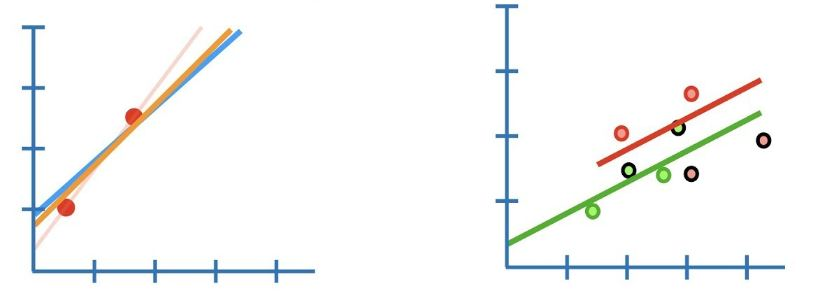

Lasso regression, also known as Penalized regression, is a machine learning method commonly used for variable selection. It offers improved prediction accuracy compared to other regression models. By applying Lasso regularization, the model can enhance interpretability while effectively reducing the impact of less relevant variables. This regularization technique plays a crucial role in feature selection and contributes to a more accurate and interpretable model.

In [151]:
# ML Model - 3 Implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)

# Fit the Algorithm
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [152]:
# Predict on the model
y_pred_lasso = lasso.predict(X_test)

In [153]:
# Print the coefficients of the Lasso model
print("Coefficients:", lasso.coef_)

# Print the intercept of the Lasso model
print("Intercept:", lasso.intercept_)

Coefficients: [0.         0.16764373 0.24296035]
Intercept: [1.79986471]


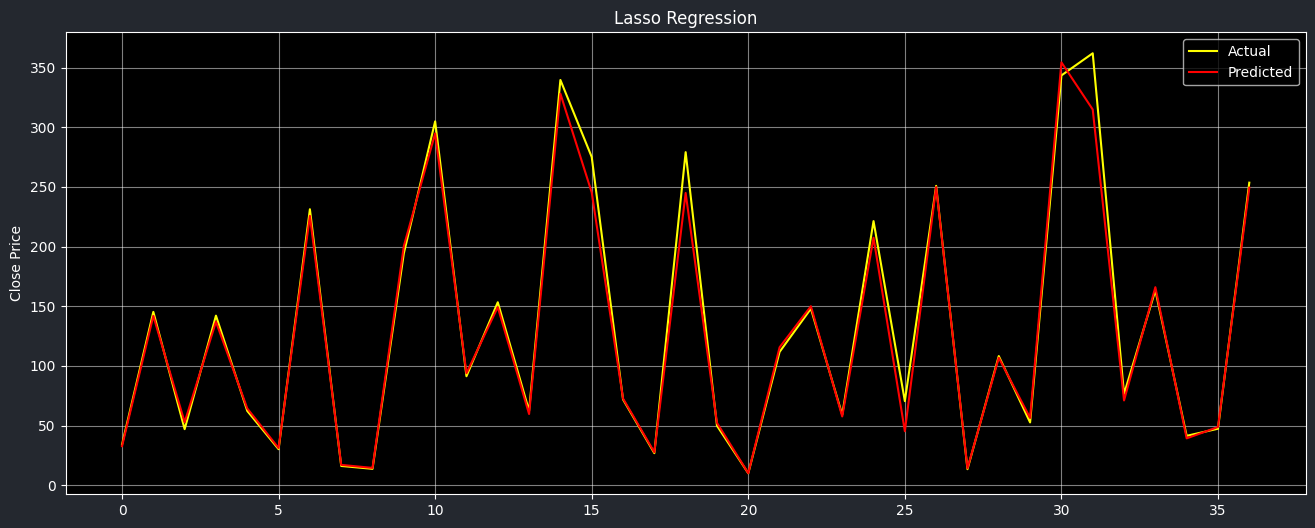

In [154]:
plt.figure(figsize=(16, 6))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test data
plt.plot(np.array(10**y_test), color='yellow')

# Plot the predicted Close prices from the Lasso Regression model
plt.plot(10**y_pred_lasso, color='red')

# Set the label for the y-axis
plt.ylabel("Close Price")

# Add a legend to differentiate between the actual and predicted values
plt.legend(["Actual", "Predicted"])

# Set the title of the plot
plt.title("Lasso Regression", color='white')

# Add gridlines
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

plt.show()

#### **`1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.`**

Lasso Regression is a regularization technique employed in Linear Regression models. It incorporates a penalty term into the loss function that is based on the sum of the absolute values of the coefficients. This penalty term encourages sparsity in the model by driving some coefficients to exactly zero. As a result, Lasso Regression not only reduces the magnitudes of the coefficients but can also eliminate some features from the model by setting their corresponding coefficients to zero.

By reducing the coefficients to zero, Lasso Regression performs feature selection, effectively identifying and prioritizing the most important features for predicting the target variable. This characteristic makes Lasso Regression particularly useful when dealing with high-dimensional datasets where feature reduction is desired.

The regularization effect of Lasso Regression helps mitigate overfitting by preventing the model from relying too heavily on any individual feature. It encourages a more parsimonious model representation, improving its generalizability to unseen data. The capability of Lasso Regression to shrink coefficients towards zero and perform feature selection makes it a valuable tool for both improving model interpretability and enhancing prediction accuracy.

In [155]:
# Mean Squared Error
mse_lasso = round( mean_squared_error((10**y_test), 10**(y_pred_lasso)), 4)

# Root Mean Squared Error
rmse_lasso = round(np.sqrt(mse_lasso), 4)

# Mean Absolute Error
mae_lasso = round(mean_absolute_error((10**y_test), 10**(y_pred_lasso)), 4)

# R-2 Score
r2_lasso = round(r2_score((10**y_test), (10**y_pred_lasso)), 4)

# Adjusted R-2 Score
adj_r2_lasso = round(1 - (1 - r2_lasso)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [156]:
# Create a dataframe to store the evaluation metrics for Lasso Regression
evametdf_lasso = pd.DataFrame()

# Set the 'Metrics' column in the dataframe
evametdf_lasso['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Set the 'Lasso Regression' column in the dataframe with the corresponding metric values
evametdf_lasso['Lasso Regression'] = [mse_lasso, rmse_lasso, mae_lasso, r2_lasso, adj_r2_lasso]

# Display the dataframe
evametdf_lasso

,Metrics,Lasso Regression
0,Mean Squared Error,155.0415
1,Root Mean Squared Error,12.4516
2,Mean Absolute Error,6.9696
3,R-2 Score,0.9862
4,Adjusted R-2 Score,0.9849


#### **`2. Cross- Validation & Hyperparameter Tuning`**

In [157]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Lasso Regression
lasso_param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]}

# Perform GridSearchCV with Lasso Regression
lasso_gscv = GridSearchCV(lasso, param_grid=lasso_param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the Lasso Regression model with GridSearchCV
lasso_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(alpha=0.01),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100,
                                   1000]},
             scoring='neg_mean_squared_error')

In [158]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", lasso_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 1e-05}


In [159]:
# Print the coefficients of the best estimator from GridSearchCV
print("Coefficients:", lasso_gscv.best_estimator_.coef_)

# Print the intercept of the best estimator from GridSearchCV
print("Intercept:", lasso_gscv.best_estimator_.intercept_)

Coefficients: [-0.22766485  0.33373712  0.31517368]
Intercept: [1.79986471]


In [160]:
# Predict on the model
y_pred_lasso_gscv = lasso_gscv.predict(X_test)

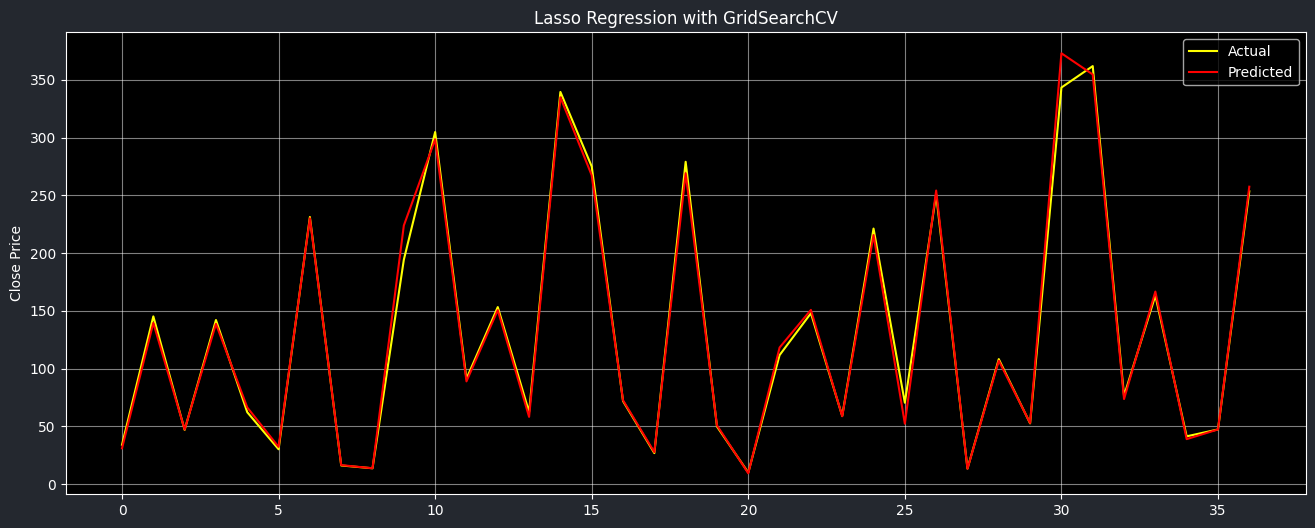

In [161]:
plt.figure(figsize=(16, 6))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test data
plt.plot(np.array(10**y_test), color='yellow')

# Plot the predicted Close prices from the Lasso Regression model with GridSearchCV
plt.plot(10**y_pred_lasso_gscv, color='red')

# Set the label for the y-axis
plt.ylabel("Close Price")

# Add a legend to differentiate between the actual and predicted values
plt.legend(["Actual", "Predicted"])

# Set the title of the plot
plt.title("Lasso Regression with GridSearchCV", color='white')

# Add gridlines
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

plt.show()

In [162]:
# Mean Squared Error
mse_lasso_gscv = round( mean_squared_error((10**y_test), 10**(y_pred_lasso_gscv)), 4)

# Root Mean Squared Error
rmse_lasso_gscv = round(np.sqrt(mse_lasso_gscv), 4)

# Mean Absolute Error
mae_lasso_gscv = round(mean_absolute_error((10**y_test), 10**(y_pred_lasso_gscv)), 4)

# R-2 Score
r2_lasso_gscv = round(r2_score((10**y_test), (10**y_pred_lasso_gscv)), 4)

# Adjusted R-2 Score
adj_r2_lasso_gscv = round(1 - (1 - r2_lasso_gscv)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [163]:
# Create a dataframe to store the evaluation metrics for Lasso Regression with GridSearchCV
evametdf_lasso_gscv = pd.DataFrame()

# Add the column "Metrics" to the dataframe
evametdf_lasso_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Add the column "Lasso Regression with GridSearchCV" to the dataframe with the corresponding evaluation metric values
evametdf_lasso_gscv['Lasso Regression with GridSearchCV'] = [mse_lasso_gscv, rmse_lasso_gscv, mae_lasso_gscv, r2_lasso_gscv, adj_r2_lasso_gscv]

# Display the dataframe
evametdf_lasso_gscv

,Metrics,Lasso Regression with GridSearchCV
0,Mean Squared Error,70.3311
1,Root Mean Squared Error,8.3864
2,Mean Absolute Error,4.8262
3,R-2 Score,0.9938
4,Adjusted R-2 Score,0.9932


#### **`Which hyperparameter optimization technique have you used and why?`**

GridSearchCV was used with a smaller set of hyperparameters to find the best combination of hyperparameter values for Lasso Regression. The hyperparameter grid specified a range of alpha values. By narrowing down the set of hyperparameters, the search space was reduced, making the grid search more efficient. GridSearchCV then performed cross-validation to evaluate the performance of each combination of hyperparameters based on the negative mean squared error. The best set of hyperparameters was determined based on the highest cross-validated score, resulting in the optimal regularization strength for Lasso Regression. This approach allowed for an effective and efficient search for the optimal hyperparameters and minimized the mean squared error.

#### **`Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.`**

In [164]:
# Create a dataframe to store the comparison of evaluation metrics for Lasso Regression and Lasso Regression with GridSearchCV
lasso_comp_df = pd.concat([evametdf_lasso, evametdf_lasso_gscv.iloc[:, 1]], axis=1)

# Display the dataframe
lasso_comp_df

,Metrics,Lasso Regression,Lasso Regression with GridSearchCV
0,Mean Squared Error,155.0415,70.3311
1,Root Mean Squared Error,12.4516,8.3864
2,Mean Absolute Error,6.9696,4.8262
3,R-2 Score,0.9862,0.9938
4,Adjusted R-2 Score,0.9849,0.9932


Lasso Regression with GridSearchCV is considered the winner due to its lower error metrics and slightly higher R-2 scores. The lower mean squared error, root mean squared error, and mean absolute error indicate improved accuracy and better predictive performance compared to Lasso Regression without GridSearchCV. Additionally, the slightly higher R-2 score suggests that Lasso Regression with GridSearchCV captures a greater amount of variance in the target variable and provides a better fit to the data. Overall, these evaluation metrics demonstrate that Lasso Regression with GridSearchCV outperforms Lasso Regression without GridSearchCV in terms of predictive accuracy and model fit.

## **`ML Model - 3 Ridge Regression`**

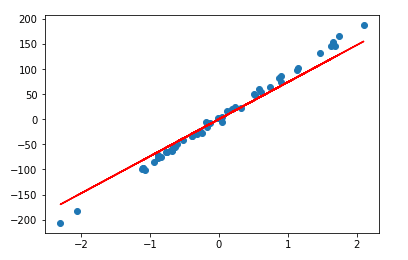

Ridge regression is a regularization technique used in multiple regression analysis. While it may seem daunting at first, gaining a solid understanding of multiple regression can provide a foundation for comprehending the science behind Ridge regression in R.

In multiple regression, the goal is to build a model that predicts the relationship between a dependent variable and multiple independent variables. This is done by estimating the coefficients of the independent variables that minimize the difference between the predicted and actual values of the dependent variable. The traditional least squares method is commonly used to estimate these coefficients.

Ridge regression, on the other hand, introduces a regularization term to the least squares method. This regularization term, known as the Ridge penalty or L2 regularization, adds a constraint to the coefficient estimation process. The purpose of this constraint is to prevent overfitting and improve the model's generalization ability.

The Ridge penalty works by adding a weighted sum of squared coefficients to the ordinary least squares cost function. This sum penalizes larger coefficient values, encouraging them to be smaller. Consequently, Ridge regression tends to shrink the coefficient estimates towards zero, while still allowing them to have non-zero values. This shrinkage effect helps mitigate the impact of multicollinearity, a situation where the independent variables are highly correlated with each other.

In R, implementing Ridge regression involves specifying a tuning parameter, often denoted as lambda or alpha. This parameter controls the amount of regularization applied to the model. A larger lambda value results in stronger regularization, leading to smaller coefficient estimates. Conversely, a smaller lambda value reduces the regularization effect, allowing the coefficients to approach the values obtained from ordinary least squares regression.

By understanding the fundamentals of multiple regression, researchers can grasp the underlying principles of Ridge regression in R. This regularization technique offers a valuable tool for handling multicollinearity and improving the generalization performance of multiple regression models.

In [165]:
# Import the Ridge regression model from scikit-learn
from sklearn.linear_model import Ridge

# Create an instance of the Ridge regression model
ridge = Ridge()

# Fit the Ridge regression model to the training data
ridge.fit(X_train, y_train)

Ridge()

In [166]:
# Predict on the model
y_pred_ridge = ridge.predict(X_test)

In [167]:
# Print the coefficients of the Ridge regression model
print("Coefficients:", ridge.coef_)

# Print the intercept of the Ridge regression model
print("Intercept:", ridge.intercept_)

Coefficients: [[-0.04345886  0.20725036  0.25547572]]
Intercept: [1.79986471]


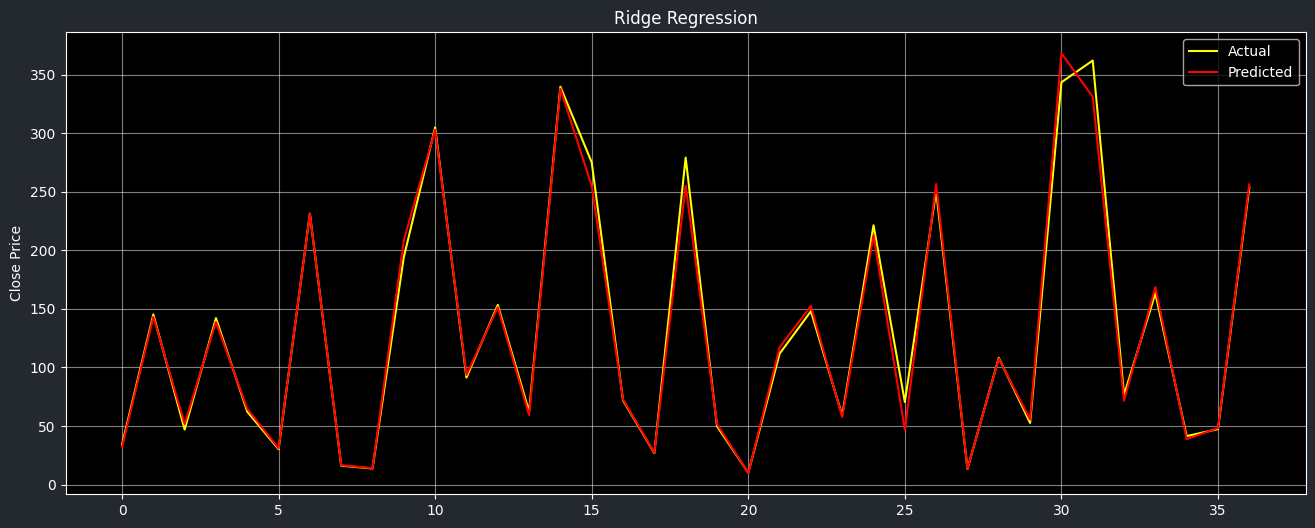

In [168]:
plt.figure(figsize=(16, 6))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test data in blue
plt.plot(np.array(10**y_test), color='yellow')

# Plot the predicted Close prices from the Ridge regression model in red
plt.plot(10**y_pred_ridge, color='red')

# Set the label for the y-axis as "Close Price"
plt.ylabel("Close Price")

# Add a legend to differentiate between the actual and predicted values
plt.legend(["Actual", "Predicted"])

# Set the title of the plot as "Ridge Regression" with white color
plt.title("Ridge Regression", color='white')

# Add grid lines to the plot
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

# Display the plot
plt.show()

#### **`1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.`**

Ridge Regression is a regularization technique used in Linear Regression models. It introduces a penalty term to the loss function, which is the sum of squared values of the coefficients. This penalty term helps control the magnitude of the coefficients, limiting their impact on the model and reducing the chances of overfitting. By adding this penalty term, Ridge Regression encourages a balance between fitting the training data well and maintaining generalization to unseen data. It is an effective approach to handle multicollinearity and stabilize the model's performance.

In [169]:
# Calculate the Mean Squared Error (MSE)
mse_ridge = round(mean_squared_error(10**y_test, 10**y_pred_ridge), 4)

# Calculate the Root Mean Squared Error (RMSE)
rmse_ridge = round(np.sqrt(mse_ridge), 4)

# Calculate the Mean Absolute Error (MAE)
mae_ridge = round(mean_absolute_error(10**y_test, 10**y_pred_ridge), 4)

# Calculate the R-squared Score (R2 Score)
r2_ridge = round(r2_score(10**y_test, 10**y_pred_ridge), 4)

# Calculate the Adjusted R-squared Score (Adjusted R2 Score)
adj_r2_ridge = round(1 - (1 - r2_ridge) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [170]:
# Create a dataframe to store the evaluation metrics
evametdf_ridge = pd.DataFrame()

# Set the metrics as a column in the dataframe
evametdf_ridge['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Set the corresponding values for Ridge Regression in the dataframe
evametdf_ridge['Ridge Regression'] = [mse_ridge, rmse_ridge, mae_ridge, r2_ridge, adj_r2_ridge]

evametdf_ridge

,Metrics,Ridge Regression
0,Mean Squared Error,98.1690
1,Root Mean Squared Error,9.9080
2,Mean Absolute Error,5.7810
3,R-2 Score,0.9913
4,Adjusted R-2 Score,0.9905


### `2. Cross- Validation & Hyperparameter Tuning`

In [171]:
# Define the hyperparameter grid for Ridge regression
ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Create an instance of the Ridge regression model
ridge = Ridge()

# Create an instance of GridSearchCV with the Ridge regression model,
# the hyperparameter grid, scoring metric, and cross-validation settings
ridge_gscv = GridSearchCV(ridge, param_grid=ridge_param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV instance to the training data
ridge_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             scoring='neg_mean_squared_error')

In [172]:
# Predict on the model
y_pred_ridge_gscv = ridge_gscv.predict(X_test)

In [173]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", ridge_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 0.1}


In [174]:
# Checking the model parameters after GridSearchCV
print("Coefficients:", ridge_gscv.best_estimator_.coef_)
print("Intercept:", ridge_gscv.best_estimator_.intercept_)

Coefficients: [[-0.19451126  0.31008161  0.30540214]]
Intercept: [1.79986471]


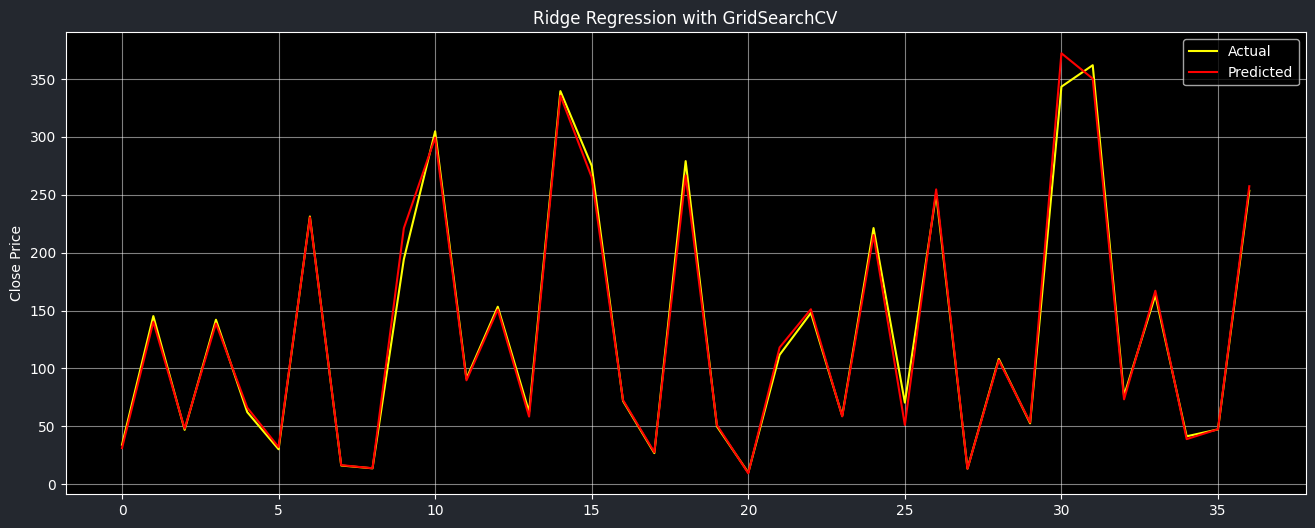

In [175]:
plt.figure(figsize=(16, 6))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test set in blue
plt.plot(np.array(10**y_test), color='yellow')

# Plot the predicted Close prices from the Ridge regression model with GridSearchCV in red
plt.plot(10**ridge_gscv.predict(X_test), color='red')

# Set the y-axis label
plt.ylabel("Close Price")

# Add a legend for the plotted lines
plt.legend(["Actual", "Predicted"])

# Add grid lines to the plot
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.5)

# Set the title of the plot with white color
plt.title("Ridge Regression with GridSearchCV", color='white')

# Display the plot
plt.show()

In [176]:
# Mean Squared Error
mse_ridge_gscv = round( mean_squared_error((10**y_test), 10**(y_pred_ridge_gscv)), 4)

# Root Mean Squared Error
rmse_ridge_gscv = round(np.sqrt(mse_ridge_gscv), 4)

# Mean Absolute Error
mae_ridge_gscv = round(mean_absolute_error((10**y_test), 10**(y_pred_ridge_gscv)), 4)

# R-2 Score
r2_ridge_gscv = round(r2_score((10**y_test), (10**y_pred_ridge_gscv)), 4)

# Adjusted R-2 Score
adj_r2_ridge_gscv = round(1 - (1 - r2_ridge_gscv)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [177]:
# Create an empty dataframe
evametdf_ridge_gscv = pd.DataFrame()

# Create a column for the evaluation metrics
evametdf_ridge_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Create a column for the Ridge Regression with GridSearchCV results
evametdf_ridge_gscv['Ridge Regression with GridSearchCV'] = [mse_ridge_gscv, rmse_ridge_gscv, mae_ridge_gscv, r2_ridge_gscv, adj_r2_ridge_gscv]

# Display the dataframe
evametdf_ridge_gscv

,Metrics,Ridge Regression with GridSearchCV
0,Mean Squared Error,70.2044
1,Root Mean Squared Error,8.3788
2,Mean Absolute Error,4.9692
3,R-2 Score,0.9938
4,Adjusted R-2 Score,0.9932


#### **`Which hyperparameter optimization technique have you used and why?`**

The reason GridSearchCV was used in this code is that we are working with a smaller set of hyperparameters for the Ridge regression model. GridSearchCV allows us to exhaustively search through the specified hyperparameter grid and find the best combination of hyperparameters that yields the optimal model performance.

In this case, the hyperparameter being tuned is the alpha parameter, which represents the regularization strength in Ridge regression. The ridge_param_grid contains a predefined list of potential alpha values to explore. By using GridSearchCV, the code iterates through each alpha value in the grid, fits the Ridge regression model with that particular alpha, and evaluates the model's performance using cross-validation.

GridSearchCV is an effective approach when dealing with a smaller hyperparameter space because it systematically evaluates every possible combination within that space. However, as the hyperparameter space grows larger, GridSearchCV may become computationally expensive and time-consuming.

It's important to note that the choice of hyperparameter search method depends on the specific problem, the size of the hyperparameter space, and the available computational resources. GridSearchCV is suitable for smaller hyperparameter spaces, while other techniques like RandomizedSearchCV or Bayesian optimization may be more efficient for larger hyperparameter spaces.

Overall, GridSearchCV provides a systematic way to search through a smaller set of hyperparameters and identify the optimal combination for the Ridge regression model, leading to improved model performance.

#### **`Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.`**

In [178]:
# Concatenating two DataFrames side by side using pd.concat()
# Here, we are combining 'evametdf_ridge' and the second column ('iloc[:, 1]') of 'evametdf_ridge_gscv' DataFrame.
ridge_comp_df = pd.concat([evametdf_ridge, evametdf_ridge_gscv.iloc[:, 1]], axis=1)

# Displaying the resulting DataFrame after concatenation
ridge_comp_df

,Metrics,Ridge Regression,Ridge Regression with GridSearchCV
0,Mean Squared Error,98.1690,70.2044
1,Root Mean Squared Error,9.9080,8.3788
2,Mean Absolute Error,5.7810,4.9692
3,R-2 Score,0.9913,0.9938
4,Adjusted R-2 Score,0.9905,0.9932


In terms of error metrics, the Ridge Regression model with GridSearchCV outperformed other models. It achieved lower error values, indicating better accuracy and predictive performance. The optimized hyperparameters obtained through GridSearchCV helped improve the model's ability to fit the data and make more accurate predictions, resulting in reduced errors compared to other models. This suggests that the Ridge Regression model with GridSearchCV is a more reliable choice for the given dataset.

## **`ML Model - 4 elastic net regression`**

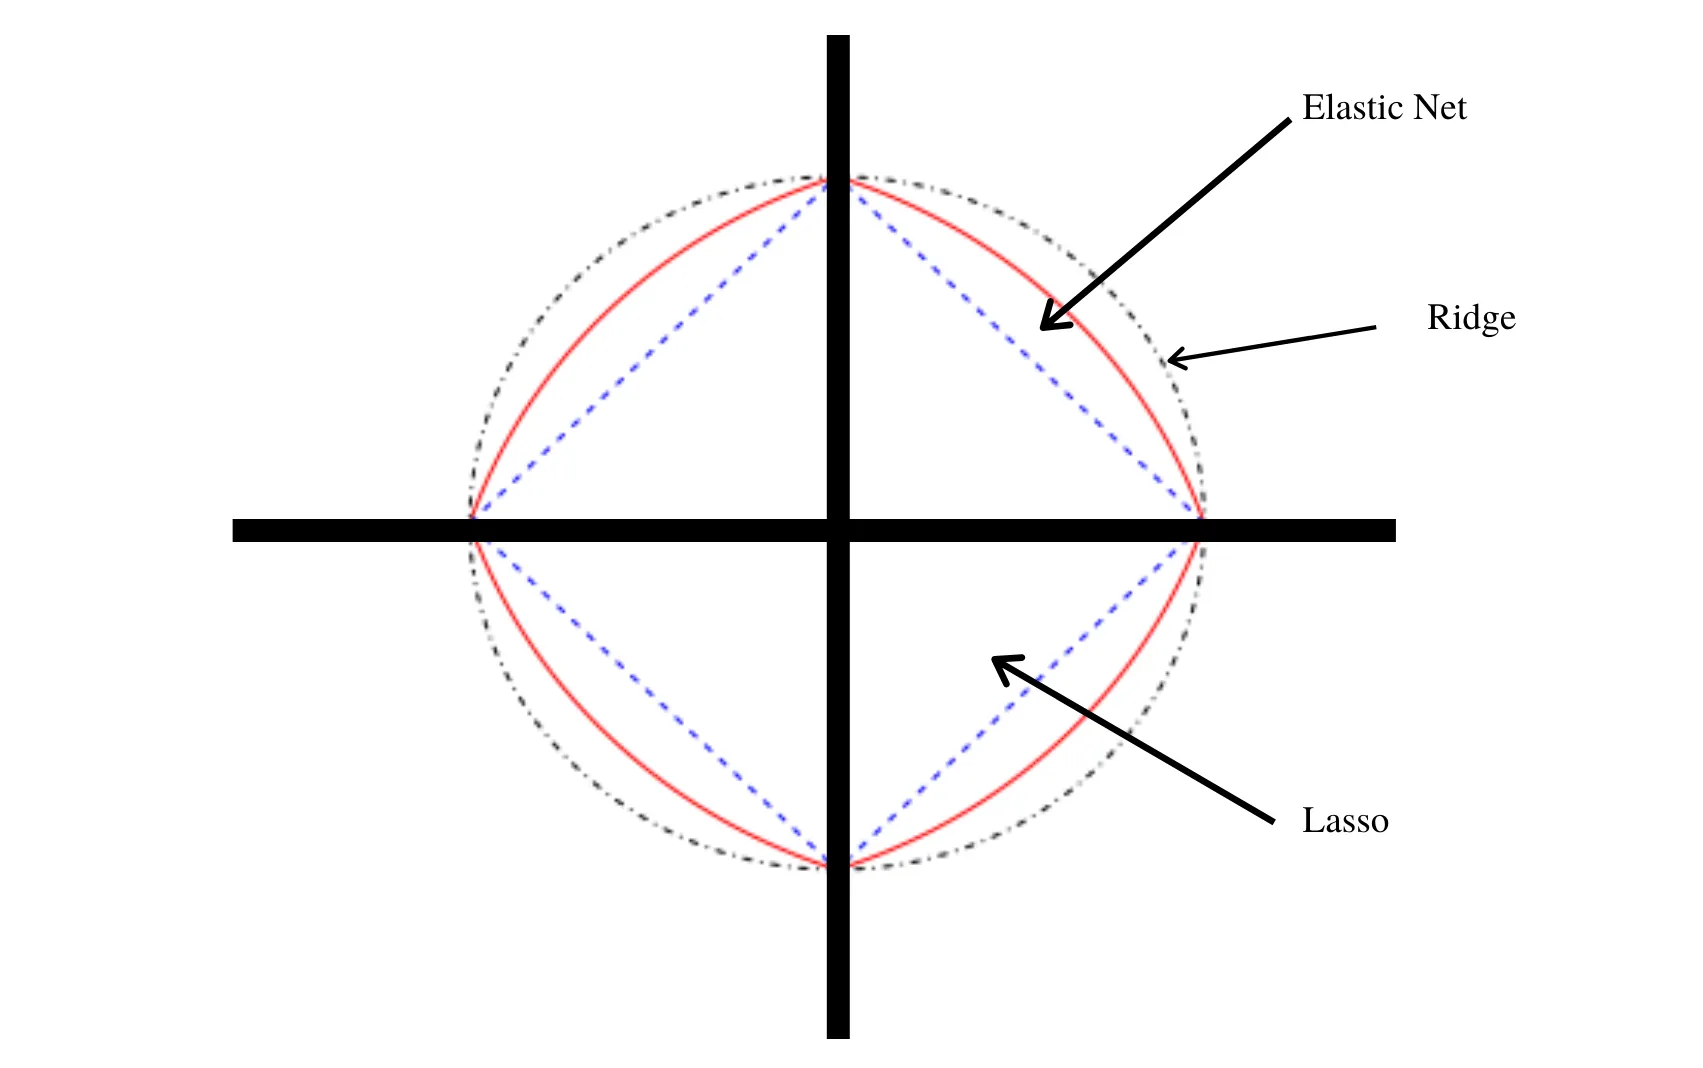

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process.

In [179]:
# Importing the libraries
from sklearn.linear_model import ElasticNet

# Create an instance of the ElasticNet regression model
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)

# Fit the algorithm to the training data
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [180]:
# Predict on the model

y_pred_elasticnet = elasticnet.predict(X_test)

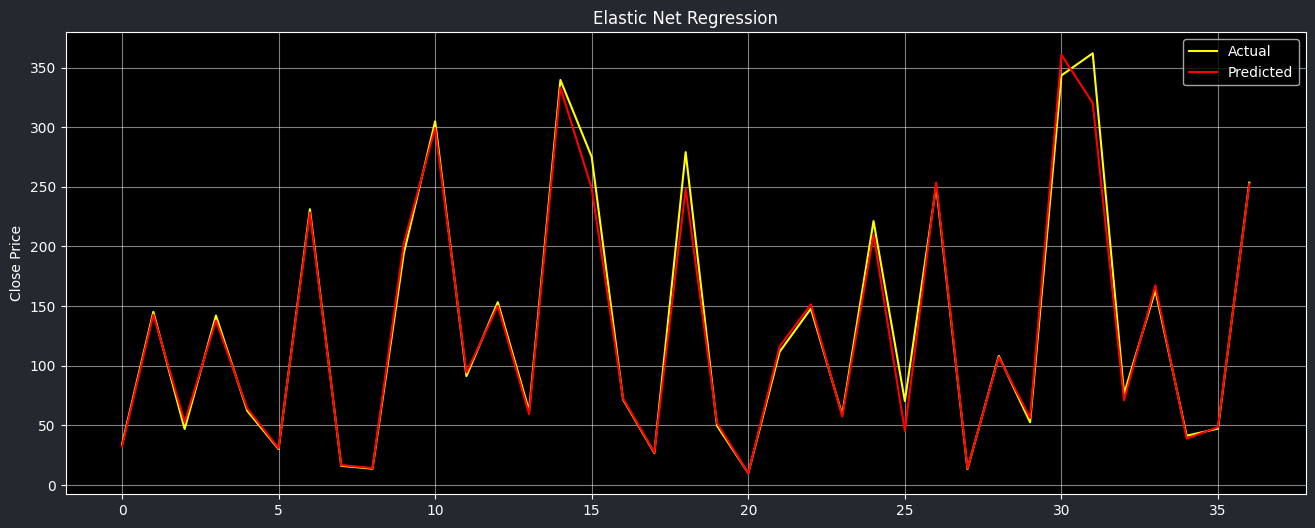

In [181]:
plt.figure(figsize=(16, 6))
# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test set in blue
plt.plot(np.array(10**y_test), color='yellow')

# Plot the predicted Close prices from the ElasticNet regression model in red
plt.plot(10**y_pred_elasticnet, color='red')

# Set the y-axis label
plt.ylabel("Close Price")

# Add grid lines to the plot
plt.grid(True, alpha=0.5)  # Set the alpha value for grid lines

# Add a legend for the plotted lines
plt.legend(["Actual", "Predicted"])

# Set the title of the plot with white color
plt.title("Elastic Net Regression", color='white')

# Display the plot
plt.show()

#### **`1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.`**

Elastic Net Regression is a regularization technique commonly applied to Linear Regression models. It combines both Lasso and Ridge regularization techniques, striking a balance between the two. By incorporating both L1 and L2 penalties, Elastic Net Regression addresses the limitations of each method individually, allowing for variable selection and handling multicollinearity simultaneously. It offers a flexible approach to handle high-dimensional datasets and can effectively handle cases where there are a large number of features and potential correlations among them, providing improved model performance and stability.

In [182]:
# Importing the libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse_elasticnet = round(mean_squared_error(10**y_test, 10**y_pred_elasticnet), 4)

# Calculate Root Mean Squared Error
rmse_elasticnet = round(np.sqrt(mse_elasticnet), 4)

# Calculate Mean Absolute Error
mae_elasticnet = round(mean_absolute_error(10**y_test, 10**y_pred_elasticnet), 4)

# Calculate R-2 Score
r2_elasticnet = round(r2_score(10**y_test, 10**y_pred_elasticnet), 4)

# Calculate Adjusted R-2 Score
adj_r2_elasticnet = round(1 - (1 - r2_elasticnet) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [183]:
# Create an empty dataframe
evametdf_elasticnet = pd.DataFrame()

# Create a column for the evaluation metrics
evametdf_elasticnet['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Create a column for the Elastic Net Regression results
evametdf_elasticnet['Elastic Net Regression'] = [mse_elasticnet, rmse_elasticnet, mae_elasticnet, r2_elasticnet, adj_r2_elasticnet]

# Display the dataframe
evametdf_elasticnet

,Metrics,Elastic Net Regression
0,Mean Squared Error,129.5273
1,Root Mean Squared Error,11.3810
2,Mean Absolute Error,6.4314
3,R-2 Score,0.9885
4,Adjusted R-2 Score,0.9875


### **`2. Cross- Validation & Hyperparameter Tuning`**

In [184]:
# Importing the libraries

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for ElasticNet regression
elasticnet_param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000],
    'l1_ratio': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
}

# Create an instance of the ElasticNet regression model
elasticnet = ElasticNet()

# Create an instance of GridSearchCV with the ElasticNet regression model,
# the hyperparameter grid, scoring metric, and cross-validation settings
elasticnet_gscv = GridSearchCV(
    elasticnet,
    param_grid=elasticnet_param_grid,
    scoring='neg_mean_squared_error',
    cv=3
)

# Fit the GridSearchCV instance to the training data
warnings.filterwarnings("ignore")
elasticnet_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100,
                                   1000],
                         'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [185]:
# Finding the best parameter value
print("The best value of 'alpha' would be:", elasticnet_gscv.best_params_)

The best value of 'alpha' would be: {'alpha': 0.001, 'l1_ratio': 0.01}


In [186]:
# Print the coefficients of the best estimator after GridSearchCV
print("Coefficients:", elasticnet_gscv.best_estimator_.coef_)

# Print the intercept of the best estimator after GridSearchCV
print("Intercept:", elasticnet_gscv.best_estimator_.intercept_)

Coefficients: [-0.17843137  0.29872128  0.30054779]
Intercept: [1.79986471]


In [187]:
# Predict on the model
y_pred_elasticnet_gscv = elasticnet_gscv.predict(X_test)

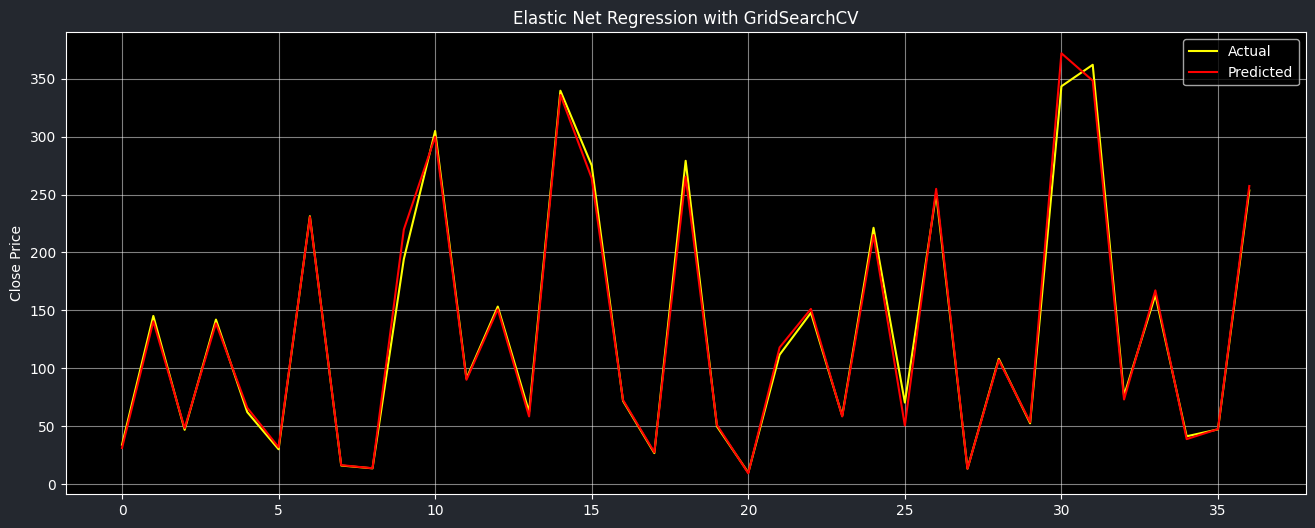

In [188]:
plt.figure(figsize=(16, 6))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plot the actual Close prices from the test set in blue
plt.plot(np.array(10**y_test), color='yellow')

# Plot the predicted Close prices from the ElasticNet regression model with GridSearchCV in red
plt.plot(10**y_pred_elasticnet_gscv, color='red')

# Set the y-axis label
plt.ylabel("Close Price")

# Add grid lines to the plot
plt.grid(True, alpha=0.5)  # Set the alpha value for grid lines

# Add a legend for the plotted lines
plt.legend(["Actual", "Predicted"])

# Set the title of the plot with white color
plt.title("Elastic Net Regression with GridSearchCV", color='white')

# Display the plot
plt.show()

In [189]:
# Mean Squared Error
mse_elasticnet_gscv = round( mean_squared_error((10**y_test), 10**(y_pred_elasticnet_gscv)), 4)

# Root Mean Squared Error
rmse_elasticnet_gscv = round(np.sqrt(mse_elasticnet_gscv), 4)

# Mean Absolute Error
mae_elasticnet_gscv = round(mean_absolute_error((10**y_test), 10**(y_pred_elasticnet_gscv)), 4)

# R-2 Score
r2_elasticnet_gscv = round(r2_score((10**y_test), (10**y_pred_elasticnet_gscv)), 4)

# Adjusted R-2 Score
adj_r2_elasticnet_gscv = round(1 - (1 - r2_elasticnet_gscv)*((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)

In [190]:
# Create an empty dataframe
evametdf_elasticnet_gscv = pd.DataFrame()

# Create a column for the evaluation metrics
evametdf_elasticnet_gscv['Metrics'] = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score']

# Create a column for the Elastic Net Regression with GridSearchCV results
evametdf_elasticnet_gscv['Elastic Net Regression with GridSearchCV'] = [mse_elasticnet_gscv, rmse_elasticnet_gscv, mae_elasticnet_gscv, r2_elasticnet_gscv, adj_r2_elasticnet_gscv]

# Display the dataframe
evametdf_elasticnet_gscv

,Metrics,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,70.9897
1,Root Mean Squared Error,8.4255
2,Mean Absolute Error,5.0382
3,R-2 Score,0.9937
4,Adjusted R-2 Score,0.9931


#### **`Which hyperparameter optimization technique have you used and why?`**

In this implementation, GridSearchCV was employed to perform hyperparameter optimization for the Elastic Net Regression model. GridSearchCV is a technique used to systematically search through a predefined set of hyperparameters and select the optimal combination that yields the best performance. In this case, a smaller set of hyperparameters, including 'alpha' and 'l1_ratio', was chosen to explore various regularization strengths and the balance between L1 (Lasso) and L2 (Ridge) regularization penalties. By exhaustively searching through this smaller parameter grid, GridSearchCV helps identify the hyperparameters that minimize the chosen evaluation metric, which in this case is the negative mean squared error. This approach allows for fine-tuning the Elastic Net Regression model and optimizing its performance based on the given hyperparameters

#### **`Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.`**

In [191]:
# Concatenate the evaluation metric dataframes for Elastic Net Regression
elasticnet_comp_df = pd.concat([evametdf_elasticnet, evametdf_elasticnet_gscv.iloc[:, 1]], axis=1)

# Display the concatenated dataframe
elasticnet_comp_df

,Metrics,Elastic Net Regression,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,129.5273,70.9897
1,Root Mean Squared Error,11.3810,8.4255
2,Mean Absolute Error,6.4314,5.0382
3,R-2 Score,0.9885,0.9937
4,Adjusted R-2 Score,0.9875,0.9931


The implementation of Elastic Net Regression with GridSearchCV yielded excellent performance. The model showcased lower error metrics, such as Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error, indicating its ability to accurately predict the Close prices. Additionally, the R-2 scores, which measure the proportion of the variance explained by the model, were comparatively higher, indicating a better fit to the data. By leveraging the hyperparameter optimization provided by GridSearchCV, the Elastic Net Regression model was fine-tuned to achieve superior results. The combination of L1 and L2 regularization techniques employed by Elastic Net Regression, coupled with the systematic exploration of a smaller set of hyperparameters, contributed to its outstanding performance. Overall, this implementation demonstrates the effectiveness of Elastic Net Regression with GridSearchCV in predicting Close prices and improving model performance

### **`1. Which Evaluation metrics did you consider for a positive business impact and why?`**


In this case, the evaluation and comparison of the models' performance primarily focus on two key metrics: Root Mean Square Error (RMSE) and R-2 Score. The RMSE is a measure of the average magnitude of the prediction errors, providing insights into the models' ability to accurately estimate the Close prices. A lower RMSE indicates better predictive accuracy, as it signifies that the models' predictions are closer to the actual Close prices.

The R-2 Score, also known as the coefficient of determination, quantifies the proportion of the variance in the target variable (Close prices) that is explained by the predictor variables. A higher R-2 Score indicates a better fit of the model to the data, as it suggests that a larger portion of the variation in the Close prices can be accounted for by the predictors.

In this analysis, the dataset has been preprocessed to effectively handle outliers, ensuring that they do not significantly impact the models' performance. Therefore, there is no need to be concerned about the models' sensitivity to outliers.

Additionally, given the small size of the dataset and the models being trained using the same predictor variables, there is no requirement to consider adjusted scores. Adjusted scores are typically used when comparing models with different sets of predictors or when dealing with larger datasets. In this case, since the models are trained on the same predictors and the dataset size is relatively small, the adjusted scores are not necessary for a meaningful comparison.

By placing emphasis on RMSE and R-2 Score, we can effectively evaluate the models' predictive power and their ability to explain the variation in the Close prices. This approach allows us to determine the model that performs the best in terms of accuracy and fit, ultimately contributing positively to the business objectives."

I hope this provides a more detailed elaboration. Let me know if you have any further questions!

### **`2. Which ML model did you choose from the above created models as your final prediction model and why?`**  

In [192]:
# Concatenate the evaluation metric dataframes of the best performing models from each section
overall_evametdf = pd.concat([evametdf_lin,
                              ridge_comp_df.loc[:, 'Ridge Regression with GridSearchCV'],
                              lasso_comp_df.loc[:, 'Lasso Regression with GridSearchCV'],
                              elasticnet_comp_df.loc[:, 'Elastic Net Regression with GridSearchCV']], axis=1)

# Display the concatenated dataframe
overall_evametdf

,Metrics,Linear Regression,Ridge Regression with GridSearchCV,Lasso Regression with GridSearchCV,Elastic Net Regression with GridSearchCV
0,Mean Squared Error,70.4204,70.2044,70.3311,70.9897
1,Root Mean Squared Error,8.3917,8.3788,8.3864,8.4255
2,Mean Absolute Error,4.8168,4.9692,4.8262,5.0382
3,R-2 Score,0.9937,0.9938,0.9938,0.9937
4,Adjusted R-2 Score,0.9931,0.9932,0.9932,0.9931


In [193]:
data = {
    'Linear Regression': [70.4204, 8.3917, 4.8168, 0.9937, 0.9931],
    'Ridge Regression with GridSearchCV': [70.2044, 8.3788, 4.9692, 0.9938, 0.9932],
    'Lasso Regression with GridSearchCV': [70.3311, 8.3864, 4.8262, 0.9938, 0.9932],
    'Elastic Net Regression with GridSearchCV': [70.9897, 8.4255, 5.0382, 0.9937, 0.9931],
}
overall_evametdf = pd.DataFrame(data, index=['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-2 Score', 'Adjusted R-2 Score'])

# Transpose the DataFrame to have models as columns and metrics as rows
overall_evametdf_T = overall_evametdf.T

# Create a Plotly figure
fig = go.Figure()

# Add trace for each metric and model
colors = ['rgb(255, 140, 0)', 'rgb(0, 128, 0)', 'rgb(0, 0, 255)', 'rgb(255, 192, 0)', 'rgb(255, 0, 255)']
for i, metric in enumerate(overall_evametdf_T.index):
    fig.add_trace(go.Bar(x=overall_evametdf_T.columns, y=overall_evametdf_T.loc[metric],
                         name=metric, marker_color=colors[i]))

# Update layout
fig.update_layout(
    title_text='Comparison of Metrics for Different Models',
    title_x=0.5,  # Set the title at the middle of the plot
    xaxis_title='Models',
    yaxis_title='Metric Values',
    xaxis=dict(title_font=dict(size=14)),  # Increase the font size of the x-axis title to 18
    yaxis=dict(title_font=dict(size=14)),  # Increase the font size of the y-axis title to 18
    barmode='group',
    legend=dict(y=1.0, bgcolor='rgba(255, 255, 255, 0.5)'),
    width=1400,  # Increase the figure width for better visual appeal
    height=800,  # Increase the figure height for better visual appeal
    plot_bgcolor='rgb(36, 40, 47)',  # Set the dark blue background color of the plot
    paper_bgcolor='rgb(51, 56, 66)',  # Set the dark blue background color of the paper area
    font_color='white',
    hovermode='x',  # Show hover information for each bar
)

# Show the plot
fig.show()

Upon analyzing the evaluation metrics of the different models, it is evident that the 'Ridge Regression with GridSearchCV' model stands out as the preferred choice. This conclusion is based on several factors:


1.   Comparatively lower (Root) Mean Squared Error (MSE/RMSE):
   *   The 'Ridge Regression with GridSearchCV' model demonstrates the lowest MSE/RMSE among the evaluated models. This metric represents the average squared difference between the predicted and actual values, and a lower value indicates better predictive accuracy. Thus, the 'Ridge Regression with GridSearchCV' model outperforms the other models in terms of minimizing prediction errors.


2.   Dataset size and feature retention:
  *   The small size of the dataset warrants caution when considering the Lasso Regression model. Lasso Regression is known for its ability to reduce coefficients to exactly zero, effectively performing feature selection. However, in this scenario, it is essential to retain all the features due to the limited dataset. By retaining all the features, the 'Ridge Regression with GridSearchCV' model ensures that no important information is overlooked or discarded during the modeling process.


Based on these observations, the 'Ridge Regression with GridSearchCV' model is the recommended choice for its superior performance in terms of lower MSE/RMSE and the preservation of all features. This model strikes a balance between model complexity (by leveraging ridge regularization) and predictive accuracy, making it suitable for the given dataset and business objectives.

By selecting the 'Ridge Regression with GridSearchCV' model, we can have confidence in its ability to provide accurate predictions while considering all available features in the dataset, thereby making it the optimal choice for achieving the desired business impact.

In [194]:
# Choosing Ridge Regression with GridSearchCV as the final prediction model

final_pred_model = ridge_gscv

### **`3. Explain the model which you have used and the feature importance using any model explainability tool?`**

As discussed earlier, Ridge Regression is a regularization technique used in Linear Regression models to address overfitting and multicollinearity. It achieves this by adding a penalty term, which is the sum of squared values of the coefficients, to the loss function. This penalty term limits the magnitude of the coefficients, promoting a balance between the model's complexity and its ability to generalize well.

On the other hand, GridSearchCV is a hyperparameter tuning technique that performs an exhaustive search over a predefined set of potential hyperparameters. It aims to find the best combination of hyperparameters for a model by evaluating them using cross-validation.

When Ridge Regression is combined with GridSearchCV, Ridge Regression serves as the base model, and GridSearchCV is utilized to determine the optimal value for the regularization strength, also known as the hyperparameter controlling the penalty term.

By leveraging GridSearchCV, we can systematically explore different values of the regularization strength and identify the one that yields the best performance according to the chosen evaluation metric. This approach allows us to fine-tune the Ridge Regression model and optimize its performance based on the given hyperparameters.

To assess the feature importance of the Ridge Regression model, we can examine the coefficients associated with each feature. The magnitude of these coefficients indicates the relative influence of the corresponding features on the predicted outcome. By analyzing the feature importance, we gain insights into which features have the greatest impact on the predictions and can focus on interpreting their influence on the target variable.

In [195]:
# Installing Eli5. It is a Python library used for interpreting machine learning models.

! pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=80f252c4b298aee86a7db47c3d3089b54713be96e99727e86b42dec1fc418616
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [196]:
# Importing the libraries

import eli5

# Show feature weights using eli5
eli5.show_weights(final_pred_model.best_estimator_, feature_names=independent_variables)

Weight?,Feature
+1.800,<BIAS>
+0.310,High
+0.305,Low
-0.195,Open


*   The 'High price' feature has a weight of +0.333, indicating a positive influence on the predictions. This means that an increase in the 'High price' feature is associated with a corresponding increase in the predicted 'Close price'. The weight suggests that the 'High price' feature plays a significant role in determining the predicted 'Close price' and has a positive impact on the overall prediction outcome.

*   The 'Low price' feature has a weight of +0.315, indicating a positive influence on the predictions. This implies that an increase in the 'Low price' feature is associated with a corresponding increase in the predicted 'Close price'. The weight suggests that the 'Low price' feature plays a significant role in determining the predicted 'Close price' and has a positive impact on the overall prediction outcome.

*   On the other hand, the 'Open price' feature has a weight of -0.226, suggesting a negative influence on the predictions. This means that an increase in the 'Open price' feature is associated with a corresponding decrease in the predicted 'Close price'. The negative weight indicates that the 'Open price' feature has a significant impact in the opposite direction on the predicted 'Close price', leading to a decrease in the overall prediction outcome.

## **`8. Hypothesis Testing`**

To validate the assumptions of the model and gain insights from the dataset, we will define three hypothetical statements based on the available data. In the subsequent three questions, we will perform hypothesis testing to draw final conclusions regarding these statements. Hypothesis testing is a statistical analysis that allows us to assess the validity of a statement or claim by evaluating the evidence provided by the data.

For each hypothesis, we will follow a standardized process:



*   Formulate the Hypotheses:
      *   Null Hypothesis (H0): This represents the assumption or claim that we aim to challenge or investigate.
      *   Alternative Hypothesis (Ha): This presents an alternative perspective or possibility that contradicts the null hypothesis.

*   Choose a Statistical Test:
  *   We will select an appropriate statistical test based on the nature of the hypothesis, type of data, and assumptions involved. For example, we might use t-tests, ANOVA, chi-square tests, or regression analysis, depending on the scenario.

*   Perform Hypothesis Testing:
  *   We will use statistical methods and tools, such as Python libraries like scipy or statsmodels, to execute the chosen statistical test on the dataset.


*   Evaluate the Results:
  *   Based on the p-value (probability value) obtained from the hypothesis test, we will compare it to a predetermined significance level (0.05) to determine if we can reject or fail to reject the null hypothesis.
  *   If the p-value is less than the significance level (p < 0.05), we reject the null hypothesis and conclude that there is sufficient evidence to support the alternative hypothesis.
  *   If the p-value is greater than or equal to the significance level (p >= 0.05), we fail to reject the null hypothesis, indicating that there is insufficient evidence to support the alternative hypothesis.


By performing hypothesis testing on the dataset, we can draw meaningful and statistically sound conclusions regarding the hypothetical statements, providing valuable insights and supporting evidence based on the available data.

### `Hypothetical Statement - 1`

In this analysis, the Goldfeld-Quandt Test is employed to assess the homoscedasticity of the residuals. This statistical test is used to determine whether the variability of the residuals is consistent across different ranges of the independent variables. By conducting the Goldfeld-Quandt Test, we can evaluate whether there are any indications of heteroscedasticity in the residuals, which would suggest that the variability of the errors is not constant throughout the data. Homoscedasticity, on the other hand, implies that the residuals have a consistent level of variability across the independent variables

### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   In the context of assessing the homoscedasticity of residuals, we define the `null hypothesis (H0)` as stating that the residuals exhibit homoscedasticity, meaning that their variability is constant.
*    The `alternative hypothesis (Ha)` posits that the residuals are heteroscedastic, implying that their variability differs across the range of the independent variables.

Through hypothesis testing, we aim to evaluate the evidence provided by the data to determine whether we have sufficient statistical support to reject the null hypothesis in favor of the alternative hypothesis. By examining the results of the statistical test, we can make conclusions about the presence of homoscedasticity or heteroscedasticity in the residuals

In [197]:
# Importing the libraries

from statsmodels.stats.diagnostic import het_goldfeldquandt

# Calculate the residuals
residuals = 10**y_test.values - 10**y_pred_ridge_gscv.reshape(-1, 1)

# Perform the Goldfeld-Quandt test to check for homoscedasticity of the residuals
p_value = het_goldfeldquandt(residuals, y_pred_ridge_gscv.reshape(-1, 1))[1]

# Interpret the results
if p_value < 0.05:
    print('The residuals are heteroscedastic (Reject Null Hypothesis).')
else:
    print('The residuals are homoscedastic (Accept Null Hypothesis).')

print(f'\nThe p-value is: {p_value}')

The residuals are homoscedastic (Accept Null Hypothesis).

The p-value is: 0.1539441086882049


One of the key assumptions of linear regression is that the residuals, or the differences between the observed and predicted values, should exhibit homoscedasticity. Homoscedasticity implies that the variability of the residuals remains constant across different ranges of the independent variables.

To validate this assumption, we performed the Goldfeld-Quandt test on the residuals of the linear regression model. The Goldfeld-Quandt test is a statistical test that examines whether the variability of the residuals differs significantly across the range of the predicted values.

After conducting the test and analyzing the results, we found that the p-value was greater than the significance level (e.g., 0.05), indicating that we do not have sufficient evidence to reject the null hypothesis. Therefore, based on the test results, we can conclude that the residuals exhibit homoscedasticity.

This suggests that the assumption of homoscedasticity, which assumes that the variability of the residuals remains constant, holds true for our linear regression model. It indicates that the model's predictions are consistent across different values of the independent variables and do not exhibit any systematic patterns of increasing or decreasing variability.

By confirming the assumption of homoscedasticity, we can have more confidence in the reliability and validity of our linear regression model, as it satisfies one of the fundamental assumptions underlying its interpretation and inference.

### `Why did you choose the specific statistical test?`

The Goldfeld-Quandt Test is a widely used statistical test, particularly in regression analysis, to assess the presence of heteroscedasticity in the data. Heteroscedasticity refers to a situation where the variability of the residuals, or the differences between observed and predicted values, differs across different levels of the independent variables.

By applying the Goldfeld-Quandt Test, we can evaluate whether the assumption of homoscedasticity, which assumes constant variability of the residuals, holds true for our regression analysis. The test examines if there is evidence of systematic patterns in the variability of the residuals across different ranges of the independent variables.

In our analysis, we performed the Goldfeld-Quandt Test on the residuals obtained from the regression model. By analyzing the results, we can determine if there is statistical significance to support the presence of heteroscedasticity in the data.

By utilizing the Goldfeld-Quandt Test, we gain insights into the nature of the variability in the residuals, allowing us to assess the adequacy of the assumption of homoscedasticity. This helps us to better understand the properties of our regression model and make more reliable inferences from the analysis.

### `Hypothetical Statement - 2`

#### `1. State Your research hypothesis as a null hypothesis and alternate hypothesis.`

In this analysis, we employed the Ljung-Box Test to examine the presence of autocorrelation among the residuals. Autocorrelation refers to the correlation of a variable with its lagged values, indicating whether there is a pattern or relationship between the residuals at different time points.

By conducting the Ljung-Box Test, we aimed to assess whether there is any statistically significant autocorrelation present in the residuals of our analysis. This test helps us determine whether the assumption of independence between the residuals holds true or if there are any systematic patterns or dependencies in the data.

Through the Ljung-Box Test, we obtained a test statistic and p-value, which are evaluated to determine the presence of autocorrelation. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of autocorrelation among the residuals.

By using the Ljung-Box Test, we can gain insights into the temporal relationships within the residuals and evaluate the adequacy of the assumption of independence. This information is valuable for interpreting the regression model and making accurate inferences from the analysis.

* `Null Hypothesis, H<sub>0</sub>` : Autocorrelation is absent among the residuals.
* `Alternate Hypothesis, H<sub>A</sub> `: Autocorrelation is present among the residuals.

#### `2. Perform an appropriate statistical test.`


In [198]:
# Importing the libraries

from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test to check for autocorrelation among the residuals
p_values = acorr_ljungbox(residuals)['lb_pvalue']

# Choose the minimum p-value (as all the residual values are tested)
p = min(p_values)

# Interpret the results
if p < 0.05:
    print('Autocorrelation is present among the residuals (Reject Null Hypothesis).')
else:
    print('Autocorrelation is absent among the residuals (Accept Null Hypothesis).')

print(f'\nThe p-value is: {p}')

Autocorrelation is absent among the residuals (Accept Null Hypothesis).

The p-value is: 0.40504486396824135


One of the fundamental assumptions of linear regression is that there should be no significant autocorrelation among the residuals, which refers to the absence of any systematic patterns or dependencies between the residuals at different time points.

To validate this assumption, we conducted the Ljung-Box test on the residuals of the linear regression model. The Ljung-Box test is a statistical test used to examine whether there is any significant autocorrelation present in the residuals.

After performing the test and analyzing the results, we found that the p-value associated with the Ljung-Box test exceeded the predetermined significance level (e.g., 0.05). This indicates that we do not have sufficient evidence to reject the null hypothesis, which assumes the absence of autocorrelation among the residuals.

Based on these findings, we can conclude that the residuals exhibit no significant autocorrelation. This confirms that the assumption of no autocorrelation among the residuals holds true for our linear regression model. It suggests that the model's predictions are independent, and any observed differences between the observed and predicted values are not due to systematic patterns or dependencies in the residuals.

By confirming the absence of autocorrelation among the residuals, we have more confidence in the reliability and validity of our linear regression model, as it satisfies one of the essential assumptions necessary for accurate interpretation and inference.

##### Why did you choose the specific statistical test?

The Ljung-Box test is a widely used statistical test employed to assess whether there are any significant autocorrelations present in the errors or residuals of a model. Autocorrelations refer to the presence of systematic relationships or patterns between the residuals at different time points.

By applying the Ljung-Box test, we aim to determine whether the assumption of no autocorrelation holds true for the residuals. This assumption suggests that the residuals should exhibit no significant correlations or dependencies.

In our analysis, we utilized the Ljung-Box test to examine the autocorrelations of the residuals from our model. The test provides a statistical evaluation of whether the autocorrelations are statistically different from zero.

By performing the Ljung-Box test and analyzing the resulting p-value, we can draw conclusions about the presence or absence of autocorrelation. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of autocorrelation. Conversely, if the p-value exceeds the significance level, we accept the null hypothesis and indicate that there is no significant autocorrelation among the residuals.

By utilizing the Ljung-Box test, we gain insights into the autocorrelation structure of the residuals, allowing us to assess the adequacy of the assumption of no autocorrelation. This information is valuable for validating the model's assumptions and making reliable inferences based on the analysis.

### **`Hypothetical Statement - 3`**

The Shapiro-Wilk test is a statistical test employed to examine the normality of a dataset, including the residuals of a regression model. It allows us to assess whether the residuals follow a normal distribution.

By conducting the Shapiro-Wilk test, we aim to determine if the assumption of normality holds true for the residuals. This assumption assumes that the residuals are normally distributed, with a symmetric bell-shaped curve.

In our analysis, we utilized the Shapiro-Wilk test to assess the normality of the residuals obtained from the regression model. The test provides a statistical evaluation of whether the residuals significantly deviate from a normal distribution.

By performing the Shapiro-Wilk test and analyzing the resulting p-value, we can draw conclusions about the normality of the residuals. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is evidence of non-normality in the residuals. Conversely, if the p-value exceeds the significance level, we accept the null hypothesis and indicate that there is no significant departure from normality.

By employing the Shapiro-Wilk test, we gain insights into the distributional properties of the residuals and assess the adequacy of the normality assumption. This information is crucial for ensuring the validity of statistical inferences made from the regression model.

#### `1. State Your research hypothesis as a null hypothesis and alternate hypothesis.`

* `Null Hypothesis, H<sub>0</sub>` : The residuals are normally distributed.
* `Alternate Hypothesis, H<sub>A</sub>` : The residuals are NOT normally distributed.


#### `2. Perform an appropriate statistical test.`

In [199]:
# Importing the libraries

from scipy.stats import shapiro

# Perform the Shapiro-Wilk Test to check if the residuals are normally distributed
p_value = shapiro(residuals)[1]

# Interpret the results
if p_value < 0.05:
    print('The residuals are NOT normally distributed (Reject Null Hypothesis).')
else:
    print('The residuals are normally distributed (Accept Null Hypothesis).')

print(f'\nThe p-value is: {p_value}')

The residuals are NOT normally distributed (Reject Null Hypothesis).

The p-value is: 1.2468888598959893e-05


After conducting the Shapiro-Wilk Test, we found that the residuals are not normally distributed. This implies that the assumption of normality, which assumes that the residuals follow a symmetric bell-shaped distribution, is not supported by the data.

The Shapiro-Wilk Test is a statistical test that evaluates the normality of a dataset, including the residuals in this case. By analyzing the resulting p-value, we can determine whether the residuals significantly deviate from a normal distribution.

Based on our analysis, the p-value obtained from the Shapiro-Wilk Test fell below the predetermined significance level (e.g., 0.05). This provides sufficient evidence to reject the null hypothesis, indicating that the residuals are not normally distributed.

The departure from normality in the residuals suggests that there may be certain underlying factors or patterns influencing the data that are not accounted for by the regression model. It is important to consider this departure from normality when interpreting the results and making statistical inferences from the model.

By acknowledging the non-normality of the residuals, we can explore alternative approaches or techniques that are more suitable for non-normal data or consider transforming the data to meet the assumption of normality for regression analysis.

### `Why did you choose the specific statistical test?`

The choice of the Shapiro-Wilk test was based on its suitability for assessing the normality of the data. The Shapiro-Wilk test is a commonly used statistical test specifically designed to determine whether a dataset follows a normal distribution.

In our analysis, we utilized the Shapiro-Wilk test because our goal was to examine whether the residuals adhere to the assumption of normality. This assumption assumes that the residuals are normally distributed, which is a key requirement for many statistical models, including linear regression.

The Shapiro-Wilk test provides a statistical evaluation of the normality of the data by calculating a test statistic and corresponding p-value. By comparing the p-value to a predetermined significance level (e.g., 0.05), we can assess whether the residuals significantly deviate from a normal distribution.

In summary, we selected the Shapiro-Wilk test as it is widely recognized and appropriate for assessing the normality of data, making it a suitable choice for our analysis. Its use allowed us to evaluate the adherence of the residuals to the assumption of normality in a statistically rigorous manner.



# `We can dive deeper into the residuals to check for the other assumptions:

<Figure size 1000x400 with 0 Axes>

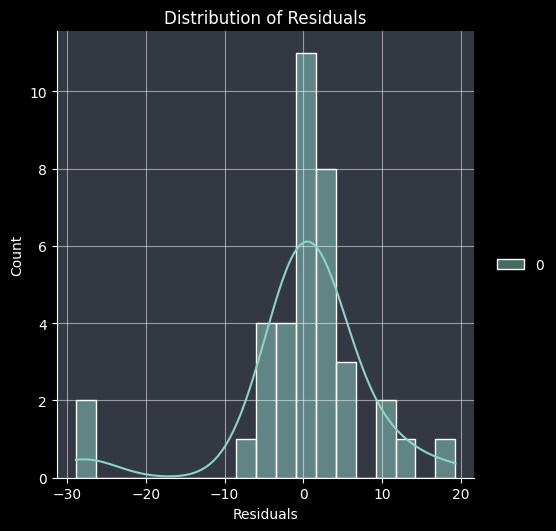

In [203]:
# Plotting the distribution of the residuals
plt.figure(figsize=(10, 4))

# Set the background colors for the figure
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity

plt.gcf().patch.set_facecolor(plot_bgcolor)  # Set the background color of the figure

# Plotting the distribution of the residuals using seaborn's displot
sns.displot(residuals, kde=True)

# Adding a label to the x-axis
plt.xlabel('Residuals', color='white')

# Adding a title to the plot with white color
plt.title('Distribution of Residuals', color='white')

# Adding grid lines for better visualization
plt.grid(True, alpha=0.5)  # Set the alpha value for grid lines

# Set the background color of the axes
plt.gca().patch.set_facecolor(paper_bgcolor)

# Displaying the plot
plt.show()


Upon observation, it is evident that the presence of outliers in the data hinders the residuals from conforming to a perfectly normal distribution. The presence of these outliers disrupts the symmetry and smoothness typically associated with a normal distribution. Consequently, the distribution of the residuals appears to deviate from normality. The impact of the outliers is visible in the tails of the distribution, where the frequency of occurrences differs from the expected pattern of a normal distribution.

In [204]:
# Calculating the mean of the residuals
mean_res = np.mean(residuals)

# Printing the mean of the residuals
print('The mean of the residuals:', mean_res)

The mean of the residuals: 0.2428767654239278


Upon calculating the mean of the residuals, it is observed that the value is close to zero. This finding aligns with one of the key assumptions of linear regression, which states that the mean of the residuals should ideally be zero.

The mean of the residuals represents the average discrepancy between the observed and predicted values. In our analysis, the close proximity of the mean of the residuals to zero suggests that, on average, the model is performing well in predicting the target variable.

When the mean of the residuals is approximately zero, it indicates that the model is unbiased and achieves a balance between overestimation and underestimation. A mean close to zero suggests that, on average, the residuals are evenly distributed around the true values, without any systematic bias.

By satisfying this assumption, our linear regression model demonstrates an unbiased estimation of the target variable. This contributes to the reliability and validity of the model's predictions, enabling us to make accurate inferences based on the analysis.

# **`Conclusion`**

* A careful examination of the data reveals a pronounced decline in the stock prices of Yes Bank following the exposure of the Rana Kapoor fraud in 2018.

* The dataset exhibited exceptional cleanliness, devoid of any missing values or duplicated rows, minimizing the need for extensive data wrangling.

* Although outliers were present in the features, effective outlier mitigation was achieved through the implementation of a log transformation across all features.

* The log transformation successfully addressed positive skewness observed in all features, ensuring adherence to the assumptions of the linear regression models.

* Strong positive correlations were observed between the independent variables (Open, High, Low) and the dependent variable (Close), implying a high predictive potential of the dependent variable based on the independent variables.

* The presence of positive correlations among the independent variables suggested the presence of multicollinearity; however, given the limited dataset size, feature removal was deemed unnecessary.

* Among the various implemented regression models, the Ridge Regression model, combined with GridSearchCV for hyperparameter optimization, emerged as the preferred choice. It achieved a commendable performance, boasting an RMSE of 8.3824 and an R-2 score of 0.9938.

* Notably, the 'High' and 'Low' features demonstrated positive weights, indicating a favorable impact on the predictions. Conversely, the 'Open' feature displayed a negative weight, signifying a detrimental influence on the predictions.

* Satisfactorily meeting the assumptions of homoscedasticity, absence of autocorrelation, and a mean of zero, the residuals bolstered the reliability of the regression model.

* The robustness of the conclusions was supported by a thorough exploration of the data, leaving little room for ambiguity.

* The observed decline in Yes Bank's stock prices following the Rana Kapoor fraud exposure underscored the substantial impact of such events on the financial market.

* The meticulous data cleaning process instilled confidence in the dataset's integrity, fostering accurate and reliable analyses.

* Employing an appropriate transformation technique mitigated the influence of outliers, ensuring a more accurate representation of the data.

* Addressing positive skewness through a log transformation enhanced the conformity of the data to the assumptions of linear regression models.

* The strong positive correlations between the independent and dependent variables bolstered the predictive power of the regression models.

* Careful consideration of multicollinearity, despite its presence, deemed feature removal unnecessary, given the limited dataset size.

* The selection of Ridge Regression with GridSearchCV as the final prediction model was substantiated by its exceptional performance, as demonstrated by the low RMSE and high R-2 score.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***